<a href="https://colab.research.google.com/github/joaquinhojman/Entrenamieto_ECI_2020/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Como levantar un archivo desde colab? https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#Repositorio: https://github.com/joaquinhojman/Entrenamieto_ECI_2020

# En el read_csv, castear las variables a los tipos que corresponden.
# En el usecols sacar: 
#     * 'Submitted_for_Approval' (Un solo valor: 0)
#     * 'Brand' (Muchos nulos: 15911)
#     * 'Product_Type' (Muchos nulos: 15935)
#     * 'Size' (Muchos nulos: 15967)
#     * 'Product_Category_B' (Muchos nulos: 15928)
#     * 'Price' (Muchos nulos; 15982)
#     * 'Currency' (Muchos nulos: 16052)
#     * 'Last_Activity' (Todos nulos)
#     * 'ASP_(converted)_Currency' (Un solo valor: 'USD')
#     * 'Actual_Delivery_Date' (Todos nulos)
#     * 'Prod_Category_A' (Un solo valor: 'Prod_Category_A_None')

url = 'https://raw.githubusercontent.com/joaquinhojman/Entrenamieto_ECI_2020/main/Entrenamieto_ECI_2020.csv'
df_frio_frio = pd.read_csv(url,\
                 usecols=['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',\
                        'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval', 'Bureaucratic_Code_0_Approved',\
                        'Bureaucratic_Code', 'Account_Created_Date', 'Source ', 'Billing_Country',\
                        'Account_Name', 'Opportunity_Name', 'Opportunity_ID', 'Sales_Contract_No', 'Account_Owner',\
                        'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',\
                        'Opportunity_Created_Date', 'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',\
                        'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP', 'ASP_(converted)',\
                        'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month', 'Delivery_Quarter',\
                        'Delivery_Year', 'TRF', 'Total_Amount_Currency', 'Total_Amount', 'Total_Taxable_Amount_Currency',\
                        'Total_Taxable_Amount', 'Stage'],\
                  dtype={
                        'Region' : 'category',
                        'Territory' : 'category',
                        'Bureaucratic_Code' : 'category',
                        'Source ' : 'category',
                        'Billing_Country' : 'category',
                        'Account_Name' : 'category',
                        'Opportunity_Name' : 'category',
                        'Account_Owner' : 'category',
                        'Opportunity_Owner' : 'category',
                        'Account_Type' : 'category',
                        'Opportunity_Type' : 'category',
                        'Quote_Type' : 'category',
                        'Delivery_Terms' : 'category',
                        'Last_Modified_By' : 'category',
                        'Product_Family' : 'category',
                        'Product_Name' : 'category',
                        'ASP_Currency' : 'category',
                        'Delivery_Quarter' : 'category',
                        'Total_Amount_Currency' : 'category',
                        'Total_Taxable_Amount_Currency' : 'category',
                        'Stage' : 'category'})
# Dataset is now stored in a Pandas Dataframe

df_frio_frio.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost


In [ ]:
#cantidad de columnas de la abse
len(df_frio_frio.columns)

41

In [ ]:
#cantidad de filas de la base
len(df_frio_frio)

16947

In [ ]:
# Sacar espacio del nombre de la columna 'Source'
df_frio_frio.rename(columns={'Source ' : 'Source', 'ASP_(converted)' : 'ASP_(converted_USD)'}, inplace=True)

In [ ]:
# Poner en la columna Month sólo el mes (que no aparezca el año)
df_frio_frio['Month'] = pd.to_datetime(df_frio_frio['Month'], format='%Y - %m').dt.month

In [ ]:
# Pasar la columna 'Sales_Contract_No' a numérico (incluídos los nulos)
df_frio_frio['Sales_Contract_No'] = df_frio_frio['Sales_Contract_No'].replace('None', np.NaN)
df_frio_frio['Sales_Contract_No'] = df_frio_frio['Sales_Contract_No'].astype('float')

In [ ]:
# Pasar las columnas de fechas a formato datetime
formato_fecha = '%m/%d/%Y'
df_frio_frio['Account_Created_Date'] = pd.to_datetime(df_frio_frio['Account_Created_Date'], format=formato_fecha) # ver fecha fila 0
df_frio_frio['Opportunity_Created_Date'] = pd.to_datetime(df_frio_frio['Opportunity_Created_Date'], format=formato_fecha) # ver fecha fila 77
df_frio_frio['Quote_Expiry_Date'] = pd.to_datetime(df_frio_frio['Quote_Expiry_Date'], format=formato_fecha) # ver fecha fila 0
df_frio_frio['Last_Modified_Date'] = pd.to_datetime(df_frio_frio['Last_Modified_Date'], format=formato_fecha) # ver fecha fila 0
df_frio_frio['Planned_Delivery_Start_Date'] = pd.to_datetime(df_frio_frio['Planned_Delivery_Start_Date'], format=formato_fecha) # ver fechas filas 0 y 1, comparar el mes con month
df_frio_frio['Planned_Delivery_End_Date'] = pd.to_datetime(df_frio_frio['Planned_Delivery_End_Date'], format=formato_fecha) # ver fecha fila 0

In [ ]:
#Estadisticas de la base
df_frio_frio.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Opportunity_ID,Sales_Contract_No,ASP,ASP_(converted_USD),Month,Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,9974.000000,13738.000000,13738.000000,16947.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,5335.940225,2725.414979,7.012128,0.432554,6.400897,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,3324.723809,1569.252469,18.858359,0.758659,3.379323,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,2448.500000,1396.500000,0.360000,0.373260,3.000000,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,5306.000000,2801.500000,0.400000,0.412850,6.000000,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,7698.000000,4009.000000,0.505000,0.476490,9.000000,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,12803.000000,6517.000000,80.000000,67.000000,12.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [ ]:
#informacion sobre las columnas de la base
df_frio_frio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  category      
 10  Billing_Country       

In [ ]:
# Me interesa ver la distribucion de las ventas exitosas y fallidas en el tiempo
# empiezo con las ventas exitosas
df_exito = df_frio_frio[['Stage','Planned_Delivery_Start_Date']] # dejo solo las columas que me interesan
df_exito = df_exito[df_exito['Stage'] == 'Closed Won']  # dejo solo los closed won
df_exito

,Stage,Planned_Delivery_Start_Date
1,Closed Won,2016-01-18
2,Closed Won,2016-01-25
7,Closed Won,2016-01-25
23,Closed Won,2016-01-09
63,Closed Won,2016-01-18
...,...,...
16937,Closed Won,2016-02-01
16939,Closed Won,2016-04-01
16942,Closed Won,2016-03-21
16943,Closed Won,2016-04-04


Text(0, 0.5, 'Densidad')

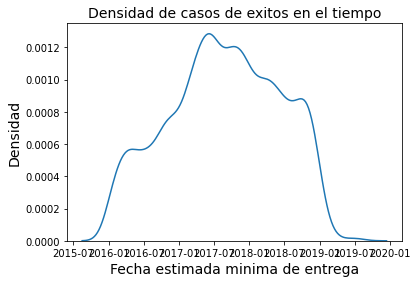

In [ ]:
#Grafico los exitos en el tiempo

g = sns.kdeplot(df_exito["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de exitos en el tiempo", fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

In [ ]:
#Ahora buscamos ver las ventas fallidas en funcion del tiempo
df_fracaso = df_frio_frio[['Stage','Planned_Delivery_Start_Date']] #dejo solo las columas que me interesan
df_fracaso = df_fracaso[df_fracaso['Stage'] == 'Closed Lost']  #dejo solo los closed won
df_fracaso

,Stage,Planned_Delivery_Start_Date
0,Closed Lost,2016-05-01
3,Closed Lost,2018-02-01
4,Closed Lost,2018-02-01
5,Closed Lost,2018-02-01
6,Closed Lost,2017-02-01
...,...,...
16938,Closed Lost,2016-08-15
16940,Closed Lost,2016-10-03
16941,Closed Lost,2016-10-03
16945,Closed Lost,2016-04-25


Text(0, 0.5, 'Densidad')

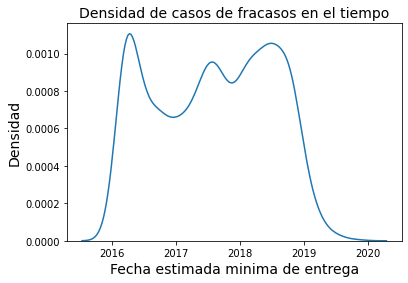

In [ ]:
#Grafico los fracasos en el tiempo

g = sns.kdeplot(df_fracaso["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de fracasos en el tiempo", fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

In [ ]:
#Tambien quiero explorar como se distribuyen los exitos por cada Region.

df_region = df_frio_frio[['Stage','Region']] #dejo solo las columas que me interesan

exitos_region = df_region[df_region['Stage'] == 'Closed Won']  #dejo solo los closed won
exitos_region = exitos_region.groupby('Region').size() 
exitos_region

Region
APAC           1896
Americas       1793
EMEA           2471
Japan          3323
Middle East      50
dtype: int64

Text(0, 0.5, 'Cantidad éxitos')

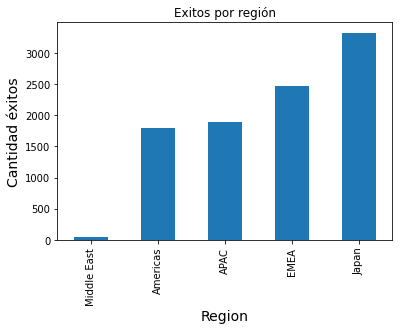

In [ ]:
g = exitos_region.nsmallest().plot.bar()
g.set_title("Exitos por región")
g.set_xlabel("Region", fontsize=14)
g.set_ylabel("Cantidad éxitos", fontsize=14)


In [ ]:
#Ahora hago lo mismo pero con los fracasos por cada Region.

fracasos_region = df_region[df_region['Stage'] == 'Closed Lost']  #dejo solo los closed lost
fracasos_region = fracasos_region.groupby('Region').size() 
fracasos_region

Region
APAC           1355
Americas       2140
EMEA           2189
Japan          1546
Middle East     120
dtype: int64

Text(0, 0.5, 'Cantidad fracasos')

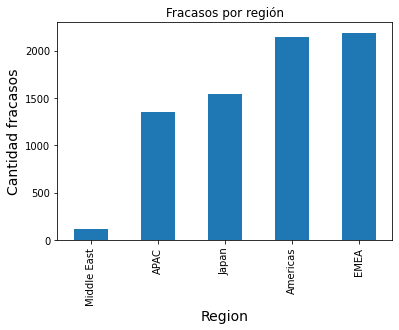

In [ ]:
g = fracasos_region.nsmallest().plot.bar()
g.set_title("Fracasos por región")
g.set_xlabel("Region", fontsize=14)
g.set_ylabel("Cantidad fracasos", fontsize=14)


In [ ]:
#Nos interesa saber si el precio es un factor determinante a la hora de cerrar una venta.
#Para eso analizaremos como se distribuyen los exitos y los fracasos en función de la variación de precio.

stage_precio = df_frio_frio[['ID','Stage','Total_Amount','Total_Amount_Currency', 'Opportunity_ID']]
stage_precio

,ID,Stage,Total_Amount,Total_Amount_Currency,Opportunity_ID
0,27761,Closed Lost,5272800.00,EUR,0
1,27760,Closed Won,48230.00,EUR,1
2,27446,Closed Won,83865.60,USD,2
3,16808,Closed Lost,7421881.50,USD,3
4,16805,Closed Lost,13357192.50,USD,4
...,...,...,...,...,...
16942,8781,Closed Won,103350.00,EUR,12801
16943,8786,Closed Won,93015.00,EUR,12801
16944,8792,Closed Won,103350.00,EUR,12801
16945,28561,Closed Lost,2346796.88,USD,12802


In [ ]:
#No nos sirve en diferentes monedas, conviene convertir todo a dolares.
#Que monedas hay en el df?
stage_precio['Total_Amount_Currency'].values


['EUR', 'EUR', 'USD', 'USD', 'USD', ..., 'EUR', 'EUR', 'EUR', 'USD', 'USD']
Length: 16947
Categories (5, object): ['AUD', 'EUR', 'GBP', 'JPY', 'USD']

In [ ]:
# Vemos que las monedas son [AUD, EUR, GBP, JPY, USD]
# Vamos a trabajar en Dolares (USD), usando https://themoneyconverter.com/ES/ al 13/10/2020 obtenemos:
change_USD = 1 #1 dolar EEUU = 1 dolar EEUU
change_EUR = 1.1745 #1 euro = 1,1745 dolares EEUU
change_AUD = 0.71601 # 1 dolar australiano = 0.71601 dolar EEUU
change_JPY = 0.0094800 # 1 yen japones = 0,0094800 dolares EEUU
change_GBP = 1.935 # 1 libra esterlina = 1,2935 dolares EEUU
# Suponemos que la moneda de ninguno de estos paises o zonas (Estados Unidos, Japon, La Unión Europea, Gran Bretaña, 
# Australia) tuvo una inflación/deflación suficientemente significativa por lo cual el tipo de cambio utilizado es
# representativo a pesar de haber sufrido ligeras variaciones en los años que aparecen en la tabla.

In [ ]:
#filtramos los datos por moneda
filtro_USD = stage_precio['Total_Amount_Currency'] == 'USD'
filtro_EUR = stage_precio['Total_Amount_Currency'] == 'EUR'
filtro_AUD = stage_precio['Total_Amount_Currency'] == 'AUD'
filtro_JPY = stage_precio['Total_Amount_Currency'] == 'JPY'
filtro_GBP = stage_precio['Total_Amount_Currency'] == 'GBP'

In [ ]:
#creamos una df separando por moneda
df_USD = stage_precio[filtro_USD]
df_EUR = stage_precio[filtro_EUR]
df_AUD = stage_precio[filtro_AUD]
df_JPY = stage_precio[filtro_JPY]
df_GBP = stage_precio[filtro_GBP]


In [ ]:
#aplicamos los cambios de moneda

df_USD.loc[:, 'Total_Amount'] = df_USD['Total_Amount']*change_USD
df_EUR.loc[:, 'Total_Amount'] = df_EUR['Total_Amount']*change_EUR
df_AUD.loc[:, 'Total_Amount'] = df_AUD['Total_Amount']*change_AUD
df_JPY.loc[:, 'Total_Amount'] = df_JPY['Total_Amount']*change_JPY
df_GBP.loc[:, 'Total_Amount'] = df_GBP['Total_Amount']*change_GBP

#Ahora uno los data frames con los cambios hechos
df_changed = df_USD.append(df_EUR).append(df_AUD).append(df_JPY).append(df_GBP).drop(['Total_Amount_Currency'], axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_changed_exitos = df_changed[df_changed['Stage'] == 'Closed Won']
agrupado_por_op_ID = df_changed_exitos.groupby('Opportunity_ID').agg({'Total_Amount' : 'sum'})
agrupado_por_op_ID = agrupado_por_op_ID.reset_index()

In [ ]:
agrupado_por_total_amount = agrupado_por_op_ID.groupby('Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount = agrupado_por_total_amount.reset_index()
agrupado_por_total_amount

,Total_Amount,Cantidad_de_ventas_por_precio
0,0.000000e+00,5
1,1.761750e-01,1
2,9.954000e+00,1
3,4.171200e+01,2
4,5.688000e+01,8
...,...,...
3971,2.362878e+07,1
3972,2.454489e+07,1
3973,3.105361e+07,1
3974,4.183522e+07,1


Text(0, 0.5, 'Ventas exitosas')

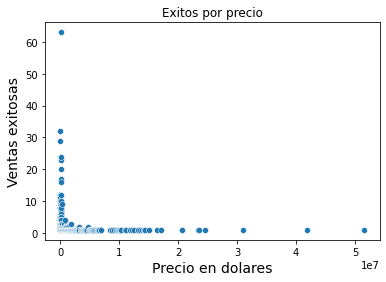

In [ ]:
# Finalmente obvtuvimos un data frame con los precios en dolares y el estado final de la ventas
# Ahora podemos observar si los precios mas altos tienen mas ventas fallidas.
# Primero graficamos las ventas exitosas y despues veremos las fallidas

# sns.set(rc={'figure.figsize':(11.7,8.27)})  #para cambiar el tamaño de los gráficos de seaborn. No lo hagan porque no queda bien la escala

g = sns.scatterplot(x="Total_Amount", y="Cantidad_de_ventas_por_precio", data=agrupado_por_total_amount, sizes=(80, 400))
g.set_title("Exitos por precio")
g.set_xlabel("Precio en dolares", fontsize=14)
g.set_ylabel("Ventas exitosas", fontsize=14)

In [ ]:
df_changed[df_changed['Stage'] == 'Closed Won']

,ID,Stage,Total_Amount,Opportunity_ID
2,27446,Closed Won,8.386560e+04,2
7,27455,Closed Won,5.068800e+04,7
23,28524,Closed Won,1.621851e+06,11
64,19342,Closed Won,3.184974e+06,21
77,4937,Closed Won,3.920000e+03,29
...,...,...,...,...
16919,21317,Closed Won,3.054627e+04,12784
16923,27689,Closed Won,1.155991e+05,12786
16924,27688,Closed Won,1.133761e+05,12787
16925,19062,Closed Won,1.662508e+05,12788


Text(0, 0.5, 'Ventas fracasadas')

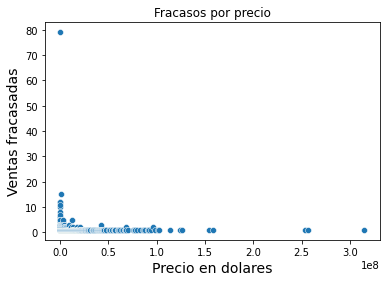

In [ ]:
#Ahora veremos las fallidas

precio_fracaso = df_changed[df_changed['Stage'] == 'Closed Lost']  #dejo solo los closed lost
agrupado_por_op_ID = precio_fracaso.groupby('Opportunity_ID').agg({'Total_Amount' : 'sum'})
agrupado_por_op_ID = agrupado_por_op_ID.reset_index()

agrupado_por_total_amount = agrupado_por_op_ID.groupby('Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount = agrupado_por_total_amount.reset_index()
agrupado_por_total_amount

#g = sns.scatterplot(x="ID", y="Total_Amount", data=precio_fracaso, color="Red")
#g.set_title("Fracaso por precio")
#g.set_xlabel("Ventas Fracasadas",fontsize=14)
#g.set_ylabel("Precio en dolares",fontsize=14)

g = sns.scatterplot(x="Total_Amount", y="Cantidad_de_ventas_por_precio", data=agrupado_por_total_amount, sizes=(80, 400))
g.set_title("Fracasos por precio")
g.set_xlabel("Precio en dolares",fontsize=14)
g.set_ylabel("Ventas fracasadas",fontsize=14)

Se analizara la cantidad de ventas por rango de precios

In [ ]:
df_changed_exitos = df_changed[df_changed['Stage'] == 'Closed Won']
agrupado_por_op_ID_won = df_changed_exitos.groupby('Opportunity_ID').agg({'Total_Amount' : 'sum'})
agrupado_por_op_ID_won = agrupado_por_op_ID_won.reset_index()

In [ ]:
agrupado_por_total_amount_won = agrupado_por_op_ID_won.groupby('Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount_won.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount_won = agrupado_por_total_amount_won.reset_index()

In [ ]:
bins_won = pd.cut(agrupado_por_total_amount_won['Total_Amount'], [0, 1000,100000,500000,1000000,10000000,1000000000])

In [ ]:
cantidad_por_rango_won = agrupado_por_total_amount_won.groupby(bins_won)['Cantidad_de_ventas_por_precio'].agg(['sum'])\
.rename(columns={'sum':'Cantidad_Won'})
cantidad_por_rango_won

,Cantidad_Won
Total_Amount,
"(0, 1000]",125
"(1000, 100000]",2944
"(100000, 500000]",1527
"(500000, 1000000]",234
"(1000000, 10000000]",210
"(10000000, 1000000000]",27


In [ ]:
precio_fracaso = df_changed[df_changed['Stage'] == 'Closed Lost']  #dejo solo los closed lost
agrupado_por_op_ID_lost = precio_fracaso.groupby('Opportunity_ID').agg({'Total_Amount' : 'sum'})
agrupado_por_op_ID_lost = agrupado_por_op_ID_lost.reset_index()

agrupado_por_total_amount_lost = agrupado_por_op_ID_lost.groupby('Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount_lost.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount_lost = agrupado_por_total_amount_lost.reset_index()

In [ ]:
bins_lost = pd.cut(agrupado_por_total_amount_lost['Total_Amount'], [0, 1000,100000,500000,1000000,10000000,1000000000])

In [ ]:
cantidad_por_rango_lost = agrupado_por_total_amount_lost.groupby(bins_lost)['Cantidad_de_ventas_por_precio'].agg(['sum'])\
.rename(columns={'sum':'Cantidad_Lost'})
cantidad_por_rango_lost

,Cantidad_Lost
Total_Amount,
"(0, 1000]",21
"(1000, 100000]",1049
"(100000, 500000]",1530
"(500000, 1000000]",527
"(1000000, 10000000]",1177
"(10000000, 1000000000]",336


In [ ]:
cantidad_por_rango_both = pd.merge(cantidad_por_rango_won, cantidad_por_rango_lost, on='Total_Amount')
cantidad_por_rango_both['Win_Percentage'] = cantidad_por_rango_both['Cantidad_Won']/(cantidad_por_rango_both['Cantidad_Won']+cantidad_por_rango_both['Cantidad_Lost'])*100
cantidad_por_rango_both = cantidad_por_rango_both.reset_index()
cantidad_por_rango_both

,Total_Amount,Cantidad_Won,Cantidad_Lost,Win_Percentage
0,"(0, 1000]",125,21,85.616438
1,"(1000, 100000]",2944,1049,73.729026
2,"(100000, 500000]",1527,1530,49.950932
3,"(500000, 1000000]",234,527,30.749014
4,"(1000000, 10000000]",210,1177,15.140591
5,"(10000000, 1000000000]",27,336,7.438017


Text(0, 0.5, 'Intervalo de Monto')

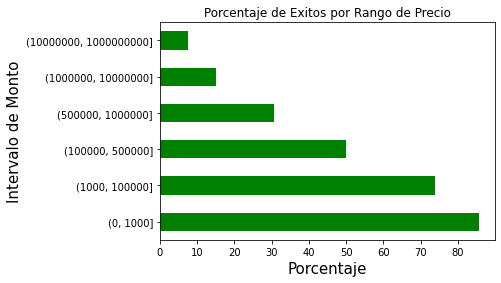

In [ ]:
ax = cantidad_por_rango_both.plot.barh(x='Total_Amount', y='Win_Percentage', color='green', title='Porcentaje de Exitos por Rango de Precio',legend=False)
ax.set_xlabel("Porcentaje", fontsize = 15)
ax.set_ylabel("Intervalo de Monto", fontsize = 15)

In [ ]:
#Los graficos observados no son concluyentes, el exito de la venta no parece depender del precio.

In [ ]:
# Ver relación entre 'TRF' y 'Product_Name'
relacion_producto_potencia = df_frio_frio.groupby('Product_Name').agg({'TRF' : 'value_counts'})
relacion_producto_potencia = relacion_producto_potencia.unstack()   # en el índice queda solo el nombre del producto
aparece_cada_prod_una_vez = relacion_producto_potencia.index.is_unique
aparece_cada_prod_una_vez

True

In [ ]:
df_frio_frio.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted_USD),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,NaN,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,2016-05-01,2016-06-30,5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39.0,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,2016-01-18,2016-01-20,1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760.0,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,0.48000,2016-01-25,2016-01-25,1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2018-02-01,2018-03-31,2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2018-02-01,2018-02-28,2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost


Nos interesa saber como estan relacionados el precio de un producto y su potencia. Ademas veremos algunos detalles particulares sobre la potencia de los productos mediante una serie de graficos y calculos.

In [ ]:

potenciaXprecio = df_frio_frio[['TRF','Total_Amount']].rename(columns={'TRF': 'Total_Power'}) #Potencia por precio 
potenciaXprecio 

,Total_Power,Total_Amount
0,10,5272800.00
1,0,48230.00
2,0,83865.60
3,14,7421881.50
4,25,13357192.50
...,...,...
16942,0,103350.00
16943,0,93015.00
16944,0,103350.00
16945,4,2346796.88


In [ ]:
#Notamos que hay muchas filas que tienen potencia cero
#No suponemos esto un error, sino que se trata de productos en los que la potencia no aplica.
#Por ejemplo: Un aire acondicionado tiene potencia, un soporte para ponerlo en la pared no la tiene.
#Nos interesan todas las ventas de la empresa, por lo tanto no removemos aquellas sin potencia.

#Antes de graficar, hacemos algunos analisis de la potencia

max(potenciaXprecio['Total_Power']) #Potencia Maxima

500

In [ ]:
min(potenciaXprecio['Total_Power']) #Potencia Minima

0

In [ ]:
(potenciaXprecio['Total_Power']).count() #cantidad de potencias, vemos que no hay nulos

16947

In [ ]:
sum(potenciaXprecio['Total_Power'])/(potenciaXprecio['Total_Power']).count() #promedio de potencia

2.3381719478373753

Text(0, 0.5, 'Precio total')

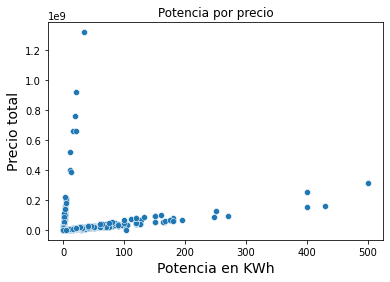

In [ ]:
#Graficamos en un scatter plot la potencia por precio

g = sns.scatterplot(x="Total_Power", y="Total_Amount", data=potenciaXprecio, sizes=(80, 400))
g.set_title("Potencia por precio")
g.set_xlabel("Potencia en KWh", fontsize=14)
g.set_ylabel("Precio total", fontsize=14)

### De esta visualización podemos inferir que en lineas generales, los productos aumentan su precio segun la potencia. Es decir a mayor potencia, mayor precio. Tambien vemos que la mayor cantidad de ventas se agrupan en torno a una potencia de hasta 200 KWh, siendo su punto de mayor densidad el de 0 KWh. El aumento visualizado es practicamente lineal.
### Sin embargo tambien notamos ciertos productos de relativa baja potencia con precios muy altos. Analizaremos luego este caso, para ver que esta ocurriendo.


In [ ]:
#Antes nos interesaria saber algunos datos solamente de los productos que tienen potencia. Para ello removemos los productos
#con potencia 0

filtro_potencia = potenciaXprecio['Total_Power'] > 0
potenciaXprecio_sinceros = potenciaXprecio[filtro_potencia]
potenciaXprecio_sinceros

,Total_Power,Total_Amount
0,10,5272800.00
3,14,7421881.50
4,25,13357192.50
5,28,14838277.50
6,7,2659494.60
...,...,...
16939,1,401700.00
16940,20,10751580.00
16941,20,10580920.00
16945,4,2346796.88


In [ ]:
min(potenciaXprecio_sinceros['Total_Power']) #Potencia Minima

1

In [ ]:
(potenciaXprecio_sinceros['Total_Power']).count() #Cantidad de elementos 

4976

In [ ]:
#Cantidad de productos con potencia 0
(potenciaXprecio['Total_Power']).count() - (potenciaXprecio_sinceros['Total_Power']).count()

11971

In [ ]:
#promedio de potencias distintas de cero
sum(potenciaXprecio_sinceros['Total_Power'])/(potenciaXprecio_sinceros['Total_Power']).count() 

7.96322347266881

### Logicamente, y como esperabamos, el promedio de potencia sube cuando removemos las potencias iguales a cero. Notamos que tan solo cerca de 1/3 de los productos tienen una potencia asociada.

In [ ]:
#Notamos de la grafica anterior que la mayoria de los productos se nuclean en potencias menores a 100KWh
#Queremos ver cuantos de estos productos tienen esa caracteristica

filtro0_100 = potenciaXprecio_sinceros['Total_Power'] < 100 
potencias0_100 = potenciaXprecio_sinceros[filtro0_100]['Total_Power']
potencias0_100.count()

4925

In [ ]:
#Es decir que aquellos productos con potencias mayores a 100 son (dentro de los que tienen potencia):
(potenciaXprecio_sinceros['Total_Power']).count() - potencias0_100.count()

51

In [ ]:
#Vemos que casi todos los productos con potencia la tienen entre 0-100. Queremos ver dentro de ese rango como
#se distribuye la potencia

potencias0_100

0        10
3        14
4        25
5        28
6         7
         ..
16939     1
16940    20
16941    20
16945     4
16946    40
Name: Total_Power, Length: 4925, dtype: int64

Text(0, 0.5, 'Densidad')

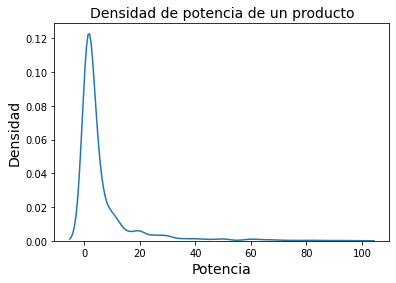

In [ ]:
g = sns.kdeplot(potencias0_100)
g.set_title("Densidad de potencia de un producto", fontsize=14)
g.set_xlabel("Potencia", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

### De este nuevo grafico inferimos lo esperado: la mayor densidad de potencias, el 25%, se agrupan en torno al cero, es decir con baja potencia cercana al cero. Recordemos que habiamos quitado las potencias cero para este analisis.
### ¿Por que esperabamos este resultado? Porque cuando calculamos el promedio este nos habia dado aproximadamente 7, es decir bastante mas cercano al 0 que al 500, que era la potencia maxima.

Text(0, 0.5, 'Densidad')

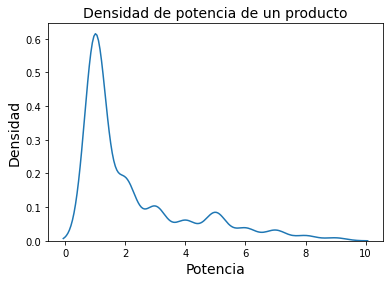

In [ ]:
#Mostraremos una nueva medición, muy parecida a la anterior pero solo para las potencias entre 0 y 10:

filtro0_10 = potenciaXprecio_sinceros['Total_Power'] < 10
potencias0_10 = potenciaXprecio_sinceros[filtro0_10]['Total_Power']

g = sns.kdeplot(potencias0_10)
g.set_title("Densidad de potencia de un producto", fontsize=14)
g.set_xlabel("Potencia", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

### De este grafico mucho mas pequeño en escala, vemos que el 70% de las potencias toma como valor 1KWh, concluyendo asi que la mayoria de los productos tienen una potencia baja. 

In [ ]:
# Cuantos productos tienen potencia 1KWh? (Agrupamos las potencias decimales entre 0 y 2)

filtro1 = (potenciaXprecio_sinceros['Total_Power'] > 0)& (potenciaXprecio_sinceros['Total_Power'] < 2)
potencias1 = potenciaXprecio_sinceros[filtro1]['Total_Power'].count()
potencias1

2192

### La cantidad total de productos con potencia era 4976, y los que tienen potencia 1 son 2912. Es facil notar que mas de la mitad de los productos con potencias distintas de cero tinen potencia = 1KWh

### En el grafico de potencias por precio presentado mas arriba, habiamos notamos ciertos productos de relativa baja potencia con precios muy altos. Queremos visualizar los datos mas detalladamente para ver si notamos alguna irregularidad.
### Notamos que estas irregularidades parecen estar bajo potencias menores a 100KWh

In [ ]:
#Removemos los datos que no nos interesan
filtro100 = potenciaXprecio['Total_Power'] < 100 
potenciasXprecio100 = potenciaXprecio[filtro100]
potenciasXprecio100

,Total_Power,Total_Amount
0,10,5272800.00
1,0,48230.00
2,0,83865.60
3,14,7421881.50
4,25,13357192.50
...,...,...
16942,0,103350.00
16943,0,93015.00
16944,0,103350.00
16945,4,2346796.88


In [ ]:
potenciasXprecio100.nlargest(20,'Total_Amount')

,Total_Power,Total_Amount
16063,33,1.320000e+09
5310,20,9.199924e+08
15641,19,7.600000e+08
5309,15,6.600053e+08
15784,20,6.600046e+08
5304,11,5.231387e+08
15459,10,4.000000e+08
16089,13,3.898800e+08
16716,3,2.211300e+08
2179,4,2.162400e+08


### A simple vista, no notamos ninguna irregularidad con estos valores. Sin mas detalles acerca del producto, no podemos decidir si estos datos son erroneos o acertados.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f71fa6afac8>,
      dtype=object)

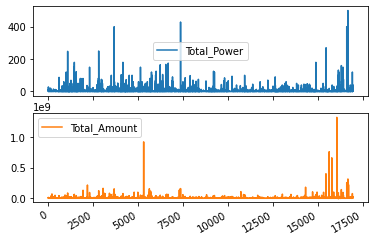

In [ ]:
#Adicionalmente agregamos otra grafica donde se ve la relacion entre el precio y la potencia del producto.
#Nuevamente observamos que en lineas generales el precio crece cuando sube la potencia.

potenciaXprecio.plot.line(subplots=True)

### Nos interesa ahora analizar el comportamiento de los vendedores de la empresa en cuanto al estado de las ventas en las que participaron. Queremos ciertos datos como "quien vendio mas", "quien vendio menos", etc.

In [ ]:
vendedoresXstage = df_frio_frio[['Opportunity_Owner','Stage']].rename(columns={'Opportunity_Owner':'Vendedor'})
vendedoresXstage

,Vendedor,Stage
0,Person_Name_18,Closed Lost
1,Person_Name_20,Closed Won
2,Person_Name_8,Closed Won
3,Person_Name_8,Closed Lost
4,Person_Name_8,Closed Lost
...,...,...
16942,Person_Name_13,Closed Won
16943,Person_Name_13,Closed Won
16944,Person_Name_13,Closed Won
16945,Person_Name_3,Closed Lost


In [ ]:
#¿Cuantos vendedores tiene la empresa?
len(vendedoresXstage['Vendedor'].value_counts())


53

In [ ]:
#Quiero ver la cantidad de exitos y fracasos que tiene cada vendedor en su haber
#solo me interesan las ventas finalizadas

filtro_finalizadas = (vendedoresXstage['Stage'] == "Closed Won") | (vendedoresXstage['Stage'] == "Closed Lost")
vendedoresXstage_finalizadas = vendedoresXstage[filtro_finalizadas]

vendedoresXstage_grouped = vendedoresXstage_finalizadas.groupby(['Vendedor']).agg({'Stage': ['value_counts']}) 
vendedoresXstage_grouped.unstack()


Stage           
               value_counts           
Stage           Closed Lost Closed Won
Vendedor                              
Person_Name_0           1.0        NaN
Person_Name_10          2.0        NaN
Person_Name_11         51.0       26.0
Person_Name_12         16.0        7.0
Person_Name_13        421.0      832.0
Person_Name_14         56.0       26.0
Person_Name_16        318.0      128.0
Person_Name_18        433.0      549.0
Person_Name_19         16.0      599.0
Person_Name_2          57.0       61.0
Person_Name_20         13.0       36.0
Person_Name_22         31.0       12.0
Person_Name_23        144.0      278.0
Person_Name_25         41.0        8.0
Person_Name_26         23.0       10.0
Person_Name_29         12.0        1.0
Person_Name_3         594.0      238.0
Person_Name_30          NaN       69.0
Person_Name_32        148.0      537.0
Person_Name_33         48.0       39.0
Person_Name_34         10.0        4.0
Person_Name_35          1.0        1.0
Person_Name_36          8.0        NaN
Person_Name_37         19.0        2.0
Person_Name_38        163.0       87.0
Person_Name_39        155.0       56.0
Person_Name_4         362.0      323.0
Person_Name_40          6.0       44.0
Person_Name_41         66.0       47.0
Person_Name_42          8.0       11.0
Person_Name_43        496.0      336.0
Person_Name_44        111.0      129.0
Person_Name_45        102.0       26.0
Person_Name_46        216.0      113.0
Person_Name_48        158.0       98.0
Person_Name_49        143.0      142.0
Person_Name_5         109.0       46.0
Person_Name_50       1284.0     2489.0
Person_Name_51         74.0       37.0
Person_Name_52         31.0      142.0
Person_Name_54         79.0       92.0
Person_Name_55         29.0       54.0
Person_Name_56          4.0        2.0
Person_Name_58          7.0        NaN
Person_Name_59         97.0       37.0
Person_Name_60        154.0       52.0
Person_Name_61          6.0        5.0
Person_Name_62         91.0       83.0
Person_Name_63         42.0       22.0
Person_Name_64        178.0      330.0
Person_Name_65         59.0      263.0
Person_Name_66         70.0      169.0
Person_Name_8         587.0      835.0

In [ ]:
# Para un analisis mas detallado, separo primero en ventas exitosas y en ventas fracasadas

filtro_exitosas = (vendedoresXstage['Stage'] == "Closed Won")
filtro_fracasadas = (vendedoresXstage['Stage'] == "Closed Lost")
vendedoresXstage_exitosas = vendedoresXstage[filtro_exitosas]
vendedoresXstage_fracasadas = vendedoresXstage[filtro_fracasadas]


In [ ]:
#primero analizo las ventas exitosas

vendedoresXstage_exitosas_grouped = vendedoresXstage_exitosas.groupby(['Vendedor']).agg({'Stage': ['count']}) 
vendedoresXstage_exitosas_grouped.head()

,Stage
,count
Vendedor,
Person_Name_0,0
Person_Name_10,0
Person_Name_11,26
Person_Name_12,7
Person_Name_13,832


In [ ]:
#¿Quien es el vendedor con mas exitos?
vendedoresXstage_exitosas_grouped.nlargest(1, ('Stage','count')).index[0]

'Person_Name_50'

In [ ]:
#¿Cuantas ventas tiene el vendedor con mas exitos?
vendedoresXstage_exitosas_grouped.nlargest(1, ('Stage','count'))

,Stage
,count
Vendedor,
Person_Name_50,2489


In [ ]:
#Ahora analizo los mismos topicos con los fracasos

vendedoresXstage_fracasadas_grouped = vendedoresXstage_fracasadas.groupby(['Vendedor']).agg({'Stage': ['count']}) 
vendedoresXstage_fracasadas_grouped.head()

,Stage
,count
Vendedor,
Person_Name_0,1
Person_Name_10,2
Person_Name_11,51
Person_Name_12,16
Person_Name_13,421


In [ ]:
#¿Quien es el vendedor con mas fracasos?
vendedoresXstage_fracasadas_grouped.nlargest(1, ('Stage','count')).index[0]

'Person_Name_50'

In [ ]:
#¿Cuantas ventas tiene el vendedor con mas fracasos?
vendedoresXstage_fracasadas_grouped.nlargest(1, ('Stage','count'))

,Stage
,count
Vendedor,
Person_Name_50,1284


### De este analisis podemos ver facilmente que el vendedor con mas fracasos... es el mismo con mas exitos! Es entonces el Mejor vendedor? O el peor? Trataremos este caso con mas detalle luego.
### Queremos visualizar esto en algunos graficos

Text(0, 0.5, 'Cantidad fracasos')

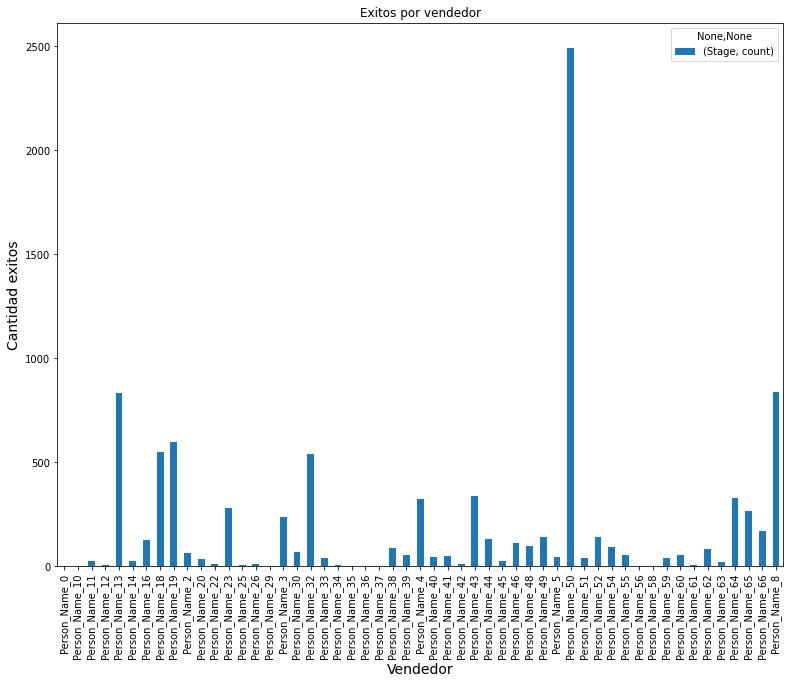

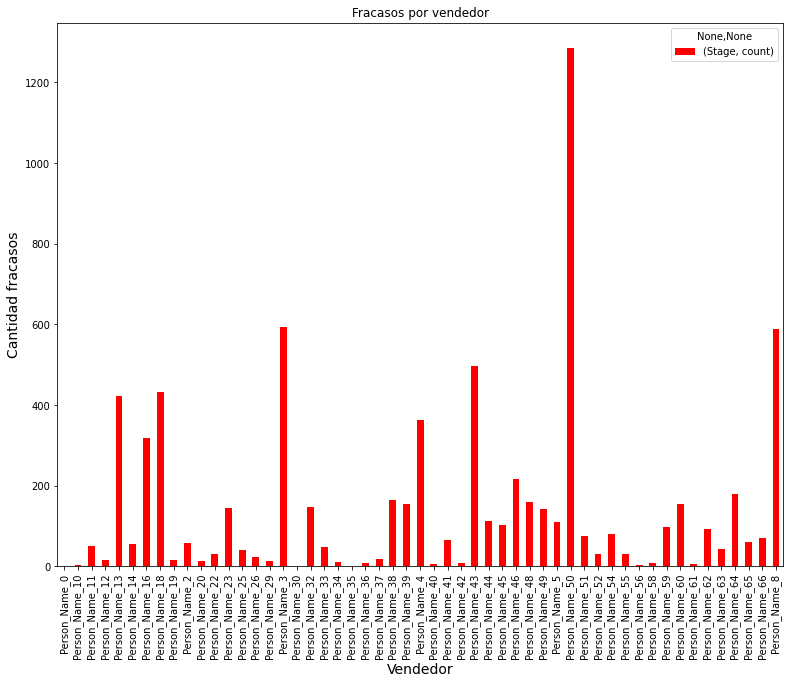

In [ ]:
#Graficamos los exitos y fracasos por vendedor

g = vendedoresXstage_exitosas_grouped.plot.bar(figsize=(13,10))
g.set_title("Exitos por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad exitos", fontsize=14)


g = vendedoresXstage_fracasadas_grouped.plot.bar(figsize=(13,10), color="red")
g.set_title("Fracasos por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad fracasos", fontsize=14)

Text(0, 0.5, 'Cantidad fracasos')

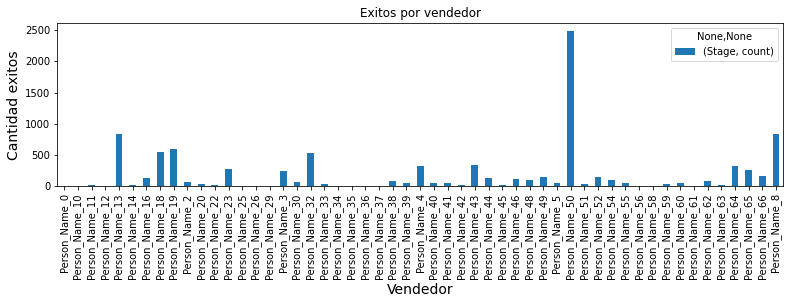

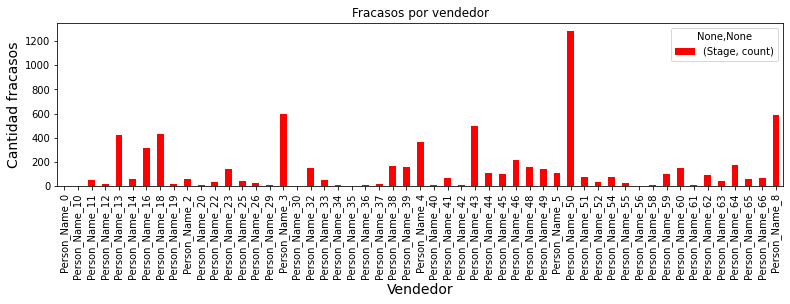

In [ ]:
#volvemos a graficarlos con una escala mas chica a fin de apreciar esta vez la diferencia entre exitos y fracasos por 
#vendedor. No lo hacemos todo en el mismo grafico porque al cantidad de vendedores x 2 haria practicamente ilegible
#una visualización conjunta

#IMPORTANTE: Notar que la escala de cantidad en exitos y en fracasos es distinta!

g = vendedoresXstage_exitosas_grouped.plot.bar(figsize=(13,3))
g.set_title("Exitos por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad exitos", fontsize=14)


g = vendedoresXstage_fracasadas_grouped.plot.bar(figsize=(13,3), color="red")
g.set_title("Fracasos por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad fracasos", fontsize=14)

### Lo que podemos inferir de estas graficas es que en lineas generales los vendedores suelen tener un numero similar de exitos y fracasos. Ya mencionamos antes el caso del "Person 50" que es el "Mejor vendedor" y el "Peor vendedor" simultaneamente. Sin embargo, trataremos a la "Person 50" como el Mejor vendedor ya que suponemos mas importantes los exitos que los fracasos. Nos reportara mas beneficio una persona que venda 10000 productos y fracase en otros 10000, que una que fracase en 0 y venda 100. La "Person 43" fracaso en 496 ventas... pero vendio 336, que es lo importante. 

### De todas formas destacamos la performance de "Person 19" y Person "32", cuyo numero de exitos es bastante mas elevado que el de fracaso, sin embargo esos exitos aun quedan lejos de nuestro "Mejor Vendedor".

In [ ]:
#Seguimos tratando de encontrar a nuestro mejor vendedor. Para ello ahora calcularemos quien es el vendedor que mas dinero
#le reporto a la empresa con sus ventas, y cual tiene el mejor promedio de ventas

#Por supuesto solo tenemos en cuenta las ventas que cerraron con Closed Won

vendedoresXprice = df_frio_frio[df_frio_frio['Stage']=="Closed Won"][['Opportunity_Owner','Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','Total_Amount':'Precio'})
vendedoresXprice

,Vendedor,Precio
1,Person_Name_20,48230.0
2,Person_Name_8,83865.6
7,Person_Name_8,50688.0
23,Person_Name_49,1621851.0
63,Person_Name_13,103350.0
...,...,...
16937,Person_Name_13,413400.0
16939,Person_Name_13,401700.0
16942,Person_Name_13,103350.0
16943,Person_Name_13,93015.0


In [ ]:
#Antes de calcular, podemos ver varios datos interesantes

#Total acumulado como ganancia por todos los vendedores
vendedoresXprice.Precio.sum()

7980332529.130001

In [ ]:
#Promedio de ganancia por venta para todos los vendedores por articulo vendido

vendedoresXprice.Precio.sum()/len(vendedoresXprice)

837127.0879188085

In [ ]:
#Articulo que mas caro se vendio

max(vendedoresXprice['Precio'])

221130000.0

In [ ]:
#Quien vendio el articulo mas caro

vendedoresXprice.nlargest(1,"Precio").Vendedor

16716    Person_Name_30
Name: Vendedor, dtype: category
Categories (53, object): ['Person_Name_0', 'Person_Name_10', 'Person_Name_11', 'Person_Name_12', ...,
                          'Person_Name_64', 'Person_Name_65', 'Person_Name_66', 'Person_Name_8']

In [ ]:
#Articulo que mas barato se vendio

min(vendedoresXprice['Precio']) #no interpretamos el cero como un error, lo suponemos un "regalo" en alguna venta

0.0

In [ ]:
#Nos interesa saber tambien la media de los precios de cada articulo

vendedoresXprice['Precio'].mean()

837214.9107354181

In [ ]:
#Tambien querriamos el desvio estandar

vendedoresXprice['Precio'].std()

5104756.159769116

In [ ]:
#Nos interesa ver ahora el promedio de venta por articulo por vendedor

vendedoresXprice_mean = vendedoresXprice.groupby(['Vendedor']).Precio.mean()
vendedoresXprice_mean

Vendedor
Person_Name_0              NaN
Person_Name_10             NaN
Person_Name_11    7.326666e+04
Person_Name_12    8.799441e+06
Person_Name_13    2.520106e+05
Person_Name_14    1.132212e+05
Person_Name_16    2.150487e+05
Person_Name_18    1.610691e+05
Person_Name_19    8.765550e+04
Person_Name_2     6.017209e+04
Person_Name_20    1.064601e+05
Person_Name_22    1.059312e+05
Person_Name_23    6.354049e+04
Person_Name_25    6.878194e+04
Person_Name_26    5.844856e+05
Person_Name_29    9.945000e+04
Person_Name_3     4.227111e+05
Person_Name_30    8.705718e+06
Person_Name_32    6.601797e+06
Person_Name_33    1.552992e+05
Person_Name_34    2.706725e+04
Person_Name_35    0.000000e+00
Person_Name_36             NaN
Person_Name_37    3.304200e+03
Person_Name_38    5.918809e+04
Person_Name_39    1.086924e+05
Person_Name_4     3.921092e+05
Person_Name_40    8.707540e+04
Person_Name_41    2.129528e+05
Person_Name_42    4.732714e+04
Person_Name_43    9.151517e+04
Person_Name_44    5.744647e+04

In [ ]:
#¿Quienes son los 10 con mejor promedio?

vendedoresXprice_mean.nlargest(10)

Vendedor
Person_Name_61    2.272758e+07
Person_Name_55    9.239013e+06
Person_Name_12    8.799441e+06
Person_Name_30    8.705718e+06
Person_Name_32    6.601797e+06
Person_Name_66    3.722395e+06
Person_Name_8     5.980066e+05
Person_Name_26    5.844856e+05
Person_Name_50    4.428151e+05
Person_Name_3     4.227111e+05
Name: Precio, dtype: float64

In [ ]:
#¿Quienes los 10 con peor promedio?

vendedoresXprice_mean.nsmallest(10)

Vendedor
Person_Name_35        0.000000
Person_Name_37     3304.200000
Person_Name_65    26108.854449
Person_Name_34    27067.250000
Person_Name_42    47327.136364
Person_Name_56    54341.250000
Person_Name_44    57446.466124
Person_Name_38    59188.089655
Person_Name_51    59341.566757
Person_Name_2     60172.086066
Name: Precio, dtype: float64

In [ ]:
#Ahora vamos a sumar los precios, para visualizar quienes recaudaron mas plata

vendedoresXprice_sum = vendedoresXprice.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_sum

Vendedor
Person_Name_0     0.000000e+00
Person_Name_10    0.000000e+00
Person_Name_11    1.904933e+06
Person_Name_12    6.159609e+07
Person_Name_13    2.096729e+08
Person_Name_14    2.943752e+06
Person_Name_16    2.752623e+07
Person_Name_18    8.842694e+07
Person_Name_19    5.250565e+07
Person_Name_2     3.670497e+06
Person_Name_20    3.832564e+06
Person_Name_22    1.271174e+06
Person_Name_23    1.766426e+07
Person_Name_25    5.502555e+05
Person_Name_26    5.844856e+06
Person_Name_29    9.945000e+04
Person_Name_3     1.006053e+08
Person_Name_30    5.919888e+08
Person_Name_32    3.545165e+09
Person_Name_33    6.056668e+06
Person_Name_34    1.082690e+05
Person_Name_35    0.000000e+00
Person_Name_36    0.000000e+00
Person_Name_37    6.608400e+03
Person_Name_38    5.149364e+06
Person_Name_39    6.086774e+06
Person_Name_4     1.266513e+08
Person_Name_40    3.831318e+06
Person_Name_41    1.000878e+07
Person_Name_42    5.205985e+05
Person_Name_43    3.074910e+07
Person_Name_44    7.410594e+06

In [ ]:
#¿Quienes son los 10 con mas recaudado?

vendedoresXprice_sum.nlargest(10)

Vendedor
Person_Name_32    3.545165e+09
Person_Name_50    1.102167e+09
Person_Name_66    6.290847e+08
Person_Name_30    5.919888e+08
Person_Name_8     4.993355e+08
Person_Name_55    4.989067e+08
Person_Name_13    2.096729e+08
Person_Name_4     1.266513e+08
Person_Name_61    1.136379e+08
Person_Name_3     1.006053e+08
Name: Precio, dtype: float64

In [ ]:
#¿Quienes son los 10 con menos recaudado?

vendedoresXprice_sum.nsmallest(10)

Vendedor
Person_Name_0          0.0
Person_Name_10         0.0
Person_Name_35         0.0
Person_Name_36         0.0
Person_Name_58         0.0
Person_Name_37      6608.4
Person_Name_29     99450.0
Person_Name_34    108269.0
Person_Name_56    108682.5
Person_Name_42    520598.5
Name: Precio, dtype: float64

### Ahora que tenemos la suma de ventas x articulo y el promedio de ventas x articulo, ambos agrupados por vendedor, podemos hacer unos graficos para extraer conclusiones.

Text(0, 0.5, 'Promedio Dinero')

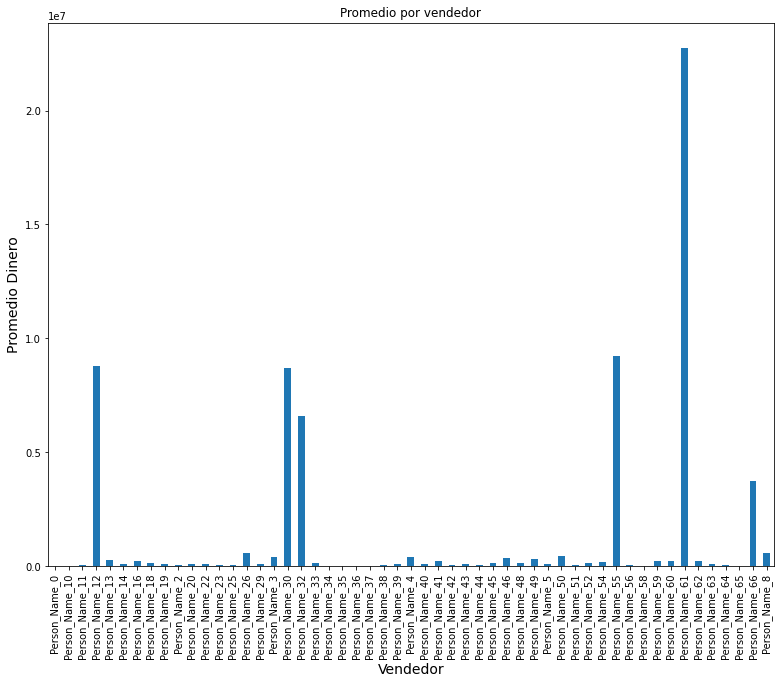

In [ ]:
#Graficamos el promedio por vendedor

g = vendedoresXprice_mean.plot.bar(figsize=(13,10))
g.set_title("Promedio por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Promedio Dinero", fontsize=14)


### vemos que solo "Unos pocos" se salen de la norma y superan ampliamente a los demas. Es decir, podemos observar claramente dos grupos: Los que tienen un promedio "Muy bajo" y los que tienen un promedio "Muy alto". Cabe destacar que es la minoria quien se encuentra dentro de este grupo de altos. 

### ¿Y el promedio que habiamos calculado antes? 

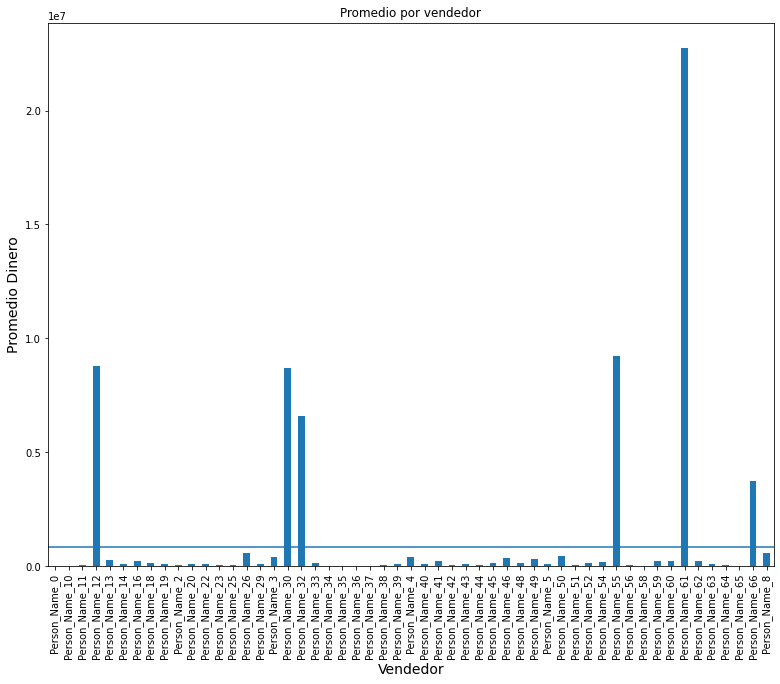

In [ ]:

g = vendedoresXprice_mean.plot.bar(figsize=(13,10))
g.set_title("Promedio por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Promedio Dinero", fontsize=14)

g.axhline(y=vendedoresXprice.Precio.sum()/len(vendedoresXprice), xmin=0, xmax=1)

### Se cumple lo que esperabamos: Unos pocos dentro del grupo de "los mejores", y muchos dentro del grupo de "los peores". Tan solo 6 vendedores estan arriba de la linea, y es tanto el dinero recaudado por ellos que elevan el promedio de forma que muy pocos, ellos mismos, lo superan.

### ¿Y nuestro mejor vendedor? ¿La person 50 que tenia mas ventas cerradas que nadie? Soprendentemente lo encontramos por debajo del promedio, y ubicado entre "Los peores"... ¿Seguimos diciendo que es el mejor?

Text(0, 0.5, 'Cantidad Dinero')

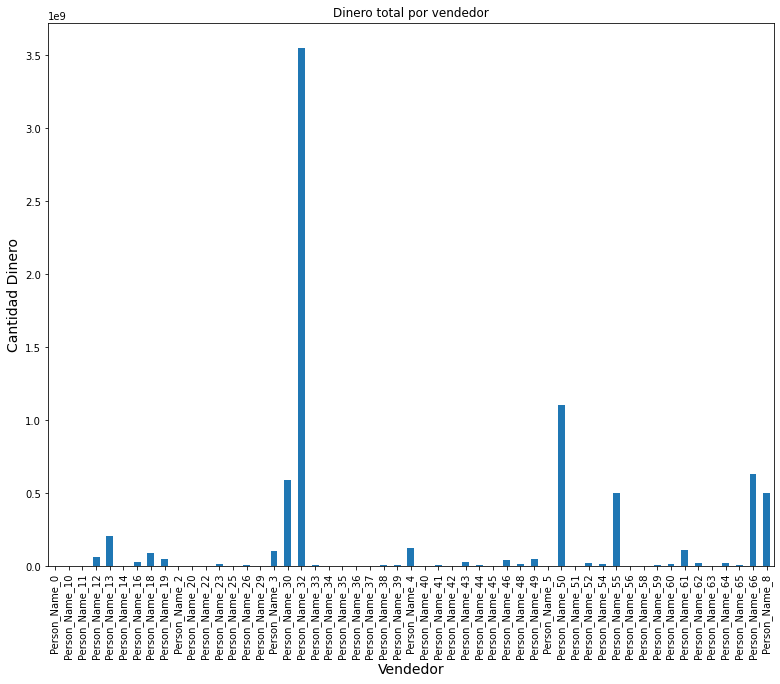

In [ ]:
#Hacemos ahora el grafico para los vendedores que mas dinero recaudaron, ¿Sera analogo al de promedios?

g = vendedoresXprice_sum.plot.bar(figsize=(13,10))
g.set_title("Dinero total por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad Dinero", fontsize=14)

### En este grafico vemos que, por mucho, la Person 32 es el vendedor que mas dinero le hizo ganar a la empresa. Sin embargo, esta persona era recien el quinto mejor vendedor en cuanto a promedios, y ocupada un lugar bastante discreto entre los que mas ventas habian cerrado. Ni siquiera era el 32 quien habia vendido el producto mas caro (era el person 30, quien era el cuarto con mejor promedio)

### Y nuestro mejor vendedor, la Person 50? A pesar de haber ocupado un lugar entre "los peores" en promedios... es el segundo vendedor que mas dinero le trajo a la empresa.

### En conclusion, por ocupar el lugar con mas cierres y segundo en mas dinero, seguiremos considerando a nuestra querida Person 50 como el Mejor vendedor de la empresa, y le daremos el honorifico segundo lugar a quien mas dinero recaudo, la Person 32. Mencion especial a la Person 30 que vendio el producto mas caro, y a la Person 61 que tiene el promedio mas alto.

### Finalmente, podemos decir que no hay una relacion directa entre ventas cerradas, promedio, y suma de ganancias, aunque ciertos vendedores evidencien una alta posición en las tres categorias. Si hay muchos, la mayoria, que aparecen bastante abajo en cada topico.

### Otra conclusión a la que podemos llegar es que en realidad el promedio es mas una "curiosidad" que algo que pueda importar mucho en una empresa. Antes habiamos dicho que no nos importaba las veces que el vendedor falla, sino las que acierta. El promedio es el mismo caso. En todo caso nos importan las ventas que la persona cerro y el dinero que le trajo a la empresa, mas que "cuanto" por cada vez promediada. Mas aun si suponemos que un vendedor joven que recien inicia fallara mas y recaudara menos que un vendedor experto con años en el negocio. Es decir en todo caso tendria mas sentido un promedio por etapas en la vida laboral del vendedor, separados en años o en cantidad de ventas.

In [ ]:
#A continuación analizaremos el comportamiento de los vendedores por region

df_frio_frio['Region'] #vemos que tenemos 5 regiones: Apac, Americas, EMEA, Japan y Middle East

0            EMEA
1            EMEA
2        Americas
3        Americas
4        Americas
           ...   
16942        EMEA
16943        EMEA
16944        EMEA
16945    Americas
16946    Americas
Name: Region, Length: 16947, dtype: category
Categories (5, object): ['APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']

In [ ]:
#separamos cada region por separado para poder analizarlas, solo tomamos las ventas ganadas.
df_won = df_frio_frio[df_frio_frio['Stage']=='Closed Won']

region_Apac = df_won[df_won['Region'] == 'APAC'][['Opportunity_Owner','Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','Total_Amount':'Precio'})
region_Americas = df_won[df_won['Region'] == 'Americas'][['Opportunity_Owner','Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','Total_Amount':'Precio'})
region_EMEA = df_won[df_won['Region'] == 'EMEA'][['Opportunity_Owner','Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','Total_Amount':'Precio'})
region_Japan = df_won[df_won['Region'] == 'Japan'][['Opportunity_Owner','Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','Total_Amount':'Precio'})
region_MiddleEast = df_won[df_won['Region'] == 'Middle East'][['Opportunity_Owner','Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','Total_Amount':'Precio'})

In [ ]:
#Ahora agrupamos por vendedor sumando sus precios

vendedoresXprice_Apac = region_Apac.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_Americas = region_Americas.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_EMEA = region_EMEA.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_Japan = region_Japan.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_MiddleEast = region_MiddleEast.groupby(['Vendedor']).Precio.sum()

In [ ]:
vendedoresXprice_Apac = vendedoresXprice_Apac[vendedoresXprice_Apac>0]
vendedoresXprice_Americas = vendedoresXprice_Americas[vendedoresXprice_Americas>0]
vendedoresXprice_EMEA = vendedoresXprice_EMEA[vendedoresXprice_EMEA>0]
vendedoresXprice_Japan = vendedoresXprice_Japan[vendedoresXprice_Japan>0]
vendedoresXprice_MiddleEast = vendedoresXprice_MiddleEast[vendedoresXprice_MiddleEast>0]


In [ ]:
#¿quienes son los cinco mejores vendedores de APAC?

vendedoresXprice_Apac.nlargest(5)

Vendedor
Person_Name_19    52505647.33
Person_Name_49    47189626.79
Person_Name_43    30749095.95
Person_Name_52    19741060.35
Person_Name_54    17579190.64
Name: Precio, dtype: float64

In [ ]:
#¿quienes son los cinco mejores vendedores de Americas?

vendedoresXprice_Americas.nlargest(5)

Vendedor
Person_Name_8     4.993355e+08
Person_Name_3     1.006053e+08
Person_Name_12    6.159609e+07
Person_Name_46    4.261223e+07
Person_Name_64    2.219054e+07
Name: Precio, dtype: float64

In [ ]:
#¿quienes son los cinco mejores vendedores de EMEA?

vendedoresXprice_EMEA.nlargest(5)

Vendedor
Person_Name_13    2.096729e+08
Person_Name_4     1.266513e+08
Person_Name_18    8.842694e+07
Person_Name_16    2.752623e+07
Person_Name_62    2.012972e+07
Name: Precio, dtype: float64

In [ ]:
#¿quienes son los cinco mejores vendedores de Japan?

vendedoresXprice_Japan.nlargest(5)

Vendedor
Person_Name_32    3.545165e+09
Person_Name_50    1.102167e+09
Person_Name_66    6.290847e+08
Person_Name_30    5.919888e+08
Person_Name_55    4.989067e+08
Name: Precio, dtype: float64

In [ ]:
#¿quienes son los cinco mejores vendedores de Middle East?

vendedoresXprice_MiddleEast.nlargest(5)

Vendedor
Person_Name_5     3078539.14
Person_Name_39    1350963.20
Person_Name_41     217223.60
Person_Name_34     103976.00
Name: Precio, dtype: float64

Text(0, 0.5, 'Region')

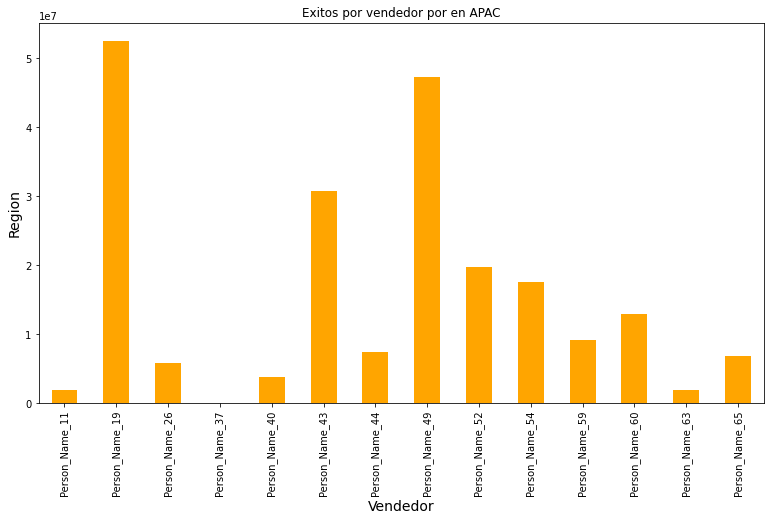

In [ ]:
#Realizamos unas graficas por region para terminar de visualizar esto.

a = vendedoresXprice_Apac.plot.bar(figsize=(13,7), color="orange")
a.set_title("Exitos por vendedor por en APAC")
a.set_xlabel("Vendedor", fontsize=14)
a.set_ylabel("Region", fontsize=14)


Text(0, 0.5, 'Region')

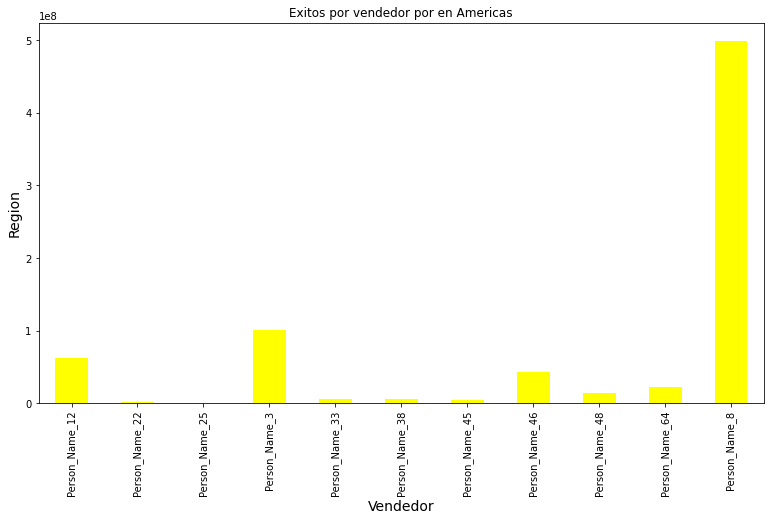

In [ ]:
b = vendedoresXprice_Americas.plot.bar(figsize=(13,7), color="yellow")
b.set_title("Exitos por vendedor por en Americas")
b.set_xlabel("Vendedor", fontsize=14)
b.set_ylabel("Region", fontsize=14)


Text(0, 0.5, 'Region')

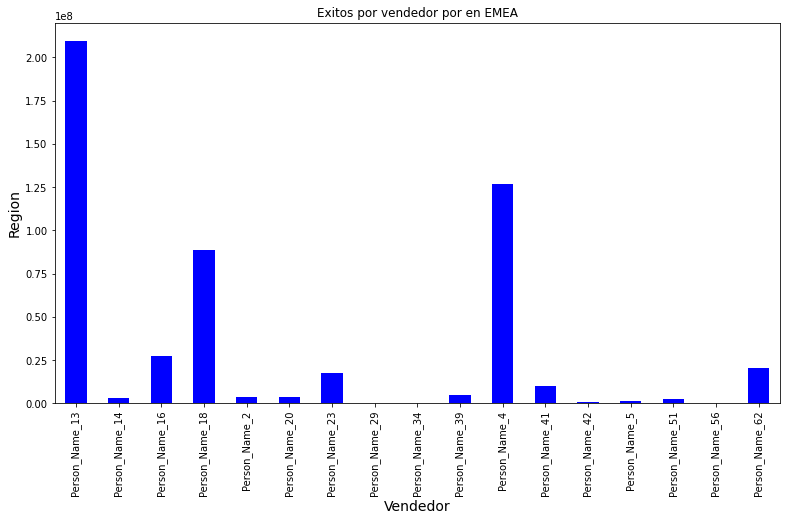

In [ ]:
c = vendedoresXprice_EMEA.plot.bar(figsize=(13,7), color="blue")
c.set_title("Exitos por vendedor por en EMEA")
c.set_xlabel("Vendedor", fontsize=14)
c.set_ylabel("Region", fontsize=14)


Text(0, 0.5, 'Region')

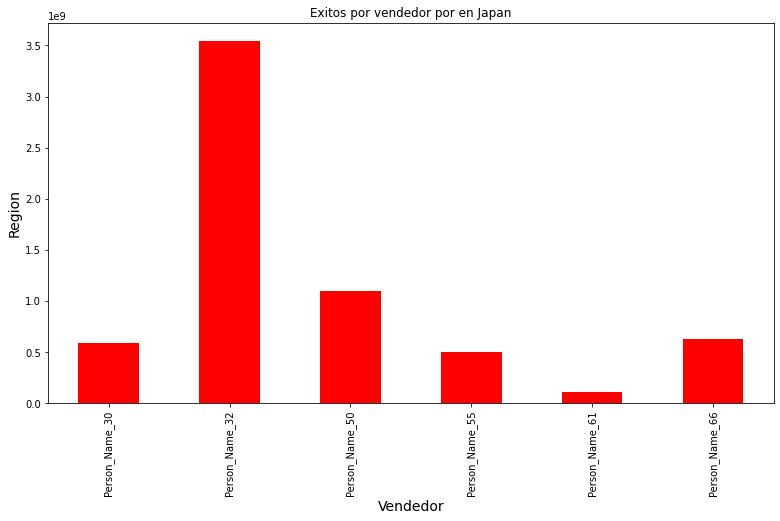

In [ ]:
d = vendedoresXprice_Japan.plot.bar(figsize=(13,7), color="red")
d.set_title("Exitos por vendedor por en Japan")
d.set_xlabel("Vendedor", fontsize=14)
d.set_ylabel("Region", fontsize=14)



Text(0, 0.5, 'Region')

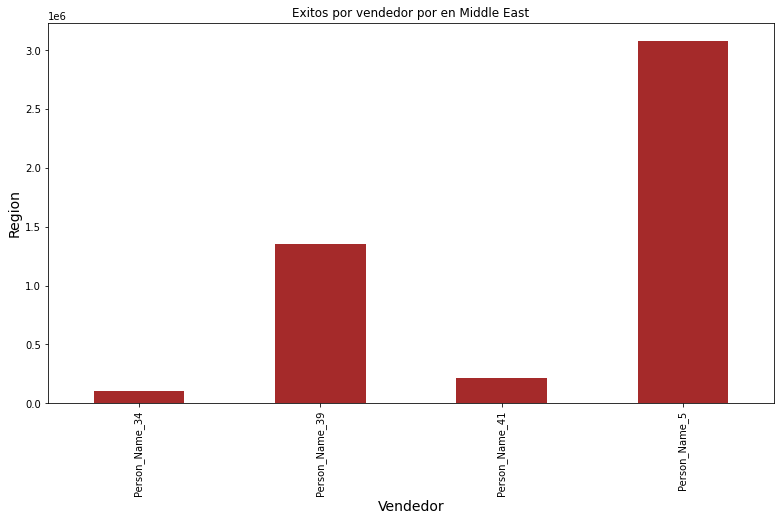

In [ ]:
e = vendedoresXprice_MiddleEast.plot.bar(figsize=(13,7), color="brown")
e.set_title("Exitos por vendedor por en Middle East")
e.set_xlabel("Vendedor", fontsize=14)
e.set_ylabel("Region", fontsize=14)


In [ ]:
df_changed['Product_Family']= df_frio_frio['Product_Family']

In [ ]:
totalVendidoPorFamilia = df_changed.groupby(['Product_Family', 'Stage']).agg({'Total_Amount':'sum'}).unstack()
totalVendidoPorFamilia.columns=['Closed_Lost_Total_Amount','Closed_Won_Total_Amount','Negotiation_Total_Amount','Proposal_Total_Amount','Qualification_Total_Amount']
totalVendidoPorFamilia.reset_index(inplace=True)
totalVendidoPorFamilia

,Product_Family,Closed_Lost_Total_Amount,Closed_Won_Total_Amount,Negotiation_Total_Amount,Proposal_Total_Amount,Qualification_Total_Amount
0,Product_Family_0,4.611072e+03,4.164564e+03,NaN,NaN,NaN
1,Product_Family_1,3.697200e+02,3.288612e+03,NaN,NaN,NaN
2,Product_Family_10,9.834552e+03,1.923871e+04,NaN,NaN,NaN
3,Product_Family_100,4.565343e+08,6.969775e+07,NaN,NaN,NaN
4,Product_Family_101,5.378733e+06,5.585563e+05,NaN,NaN,NaN
...,...,...,...,...,...,...
222,Product_Family_98,4.531500e+04,3.589688e+05,NaN,NaN,NaN
223,Product_Family_99,NaN,8.663115e+04,NaN,NaN,NaN
224,Product_Family_159,5.138560e+07,NaN,NaN,NaN,NaN
225,Product_Family_239,5.300000e+03,NaN,NaN,NaN,NaN


In [ ]:
#Las 10 familias de productos con mas perdidas
masPerdidasPorFamilia = totalVendidoPorFamilia[['Product_Family','Closed_Lost_Total_Amount','Closed_Won_Total_Amount']]
masPerdidasPorFamilia['Relacion_Perdida_Ganancia'] = totalVendidoPorFamilia['Closed_Lost_Total_Amount']/totalVendidoPorFamilia['Closed_Won_Total_Amount']
masPerdidasPorFamilia.nlargest(10,'Closed_Lost_Total_Amount')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product_Family,Closed_Lost_Total_Amount,Closed_Won_Total_Amount,Relacion_Perdida_Ganancia
60,Product_Family_164,2.498135e+09,1.263552e+08,19.770728
108,Product_Family_209,1.913898e+09,5.099019e+07,37.534641
112,Product_Family_213,1.794252e+09,3.370889e+07,53.227858
199,Product_Family_77,9.970460e+08,1.776664e+08,5.611900
66,Product_Family_170,6.290881e+08,1.962067e+07,32.062524
208,Product_Family_85,5.834762e+08,1.042937e+08,5.594548
111,Product_Family_212,5.688314e+08,4.952565e+07,11.485592
55,Product_Family_158,5.283418e+08,8.710037e+07,6.065896
107,Product_Family_208,4.950985e+08,5.772587e+07,8.576717
3,Product_Family_100,4.565343e+08,6.969775e+07,6.550201


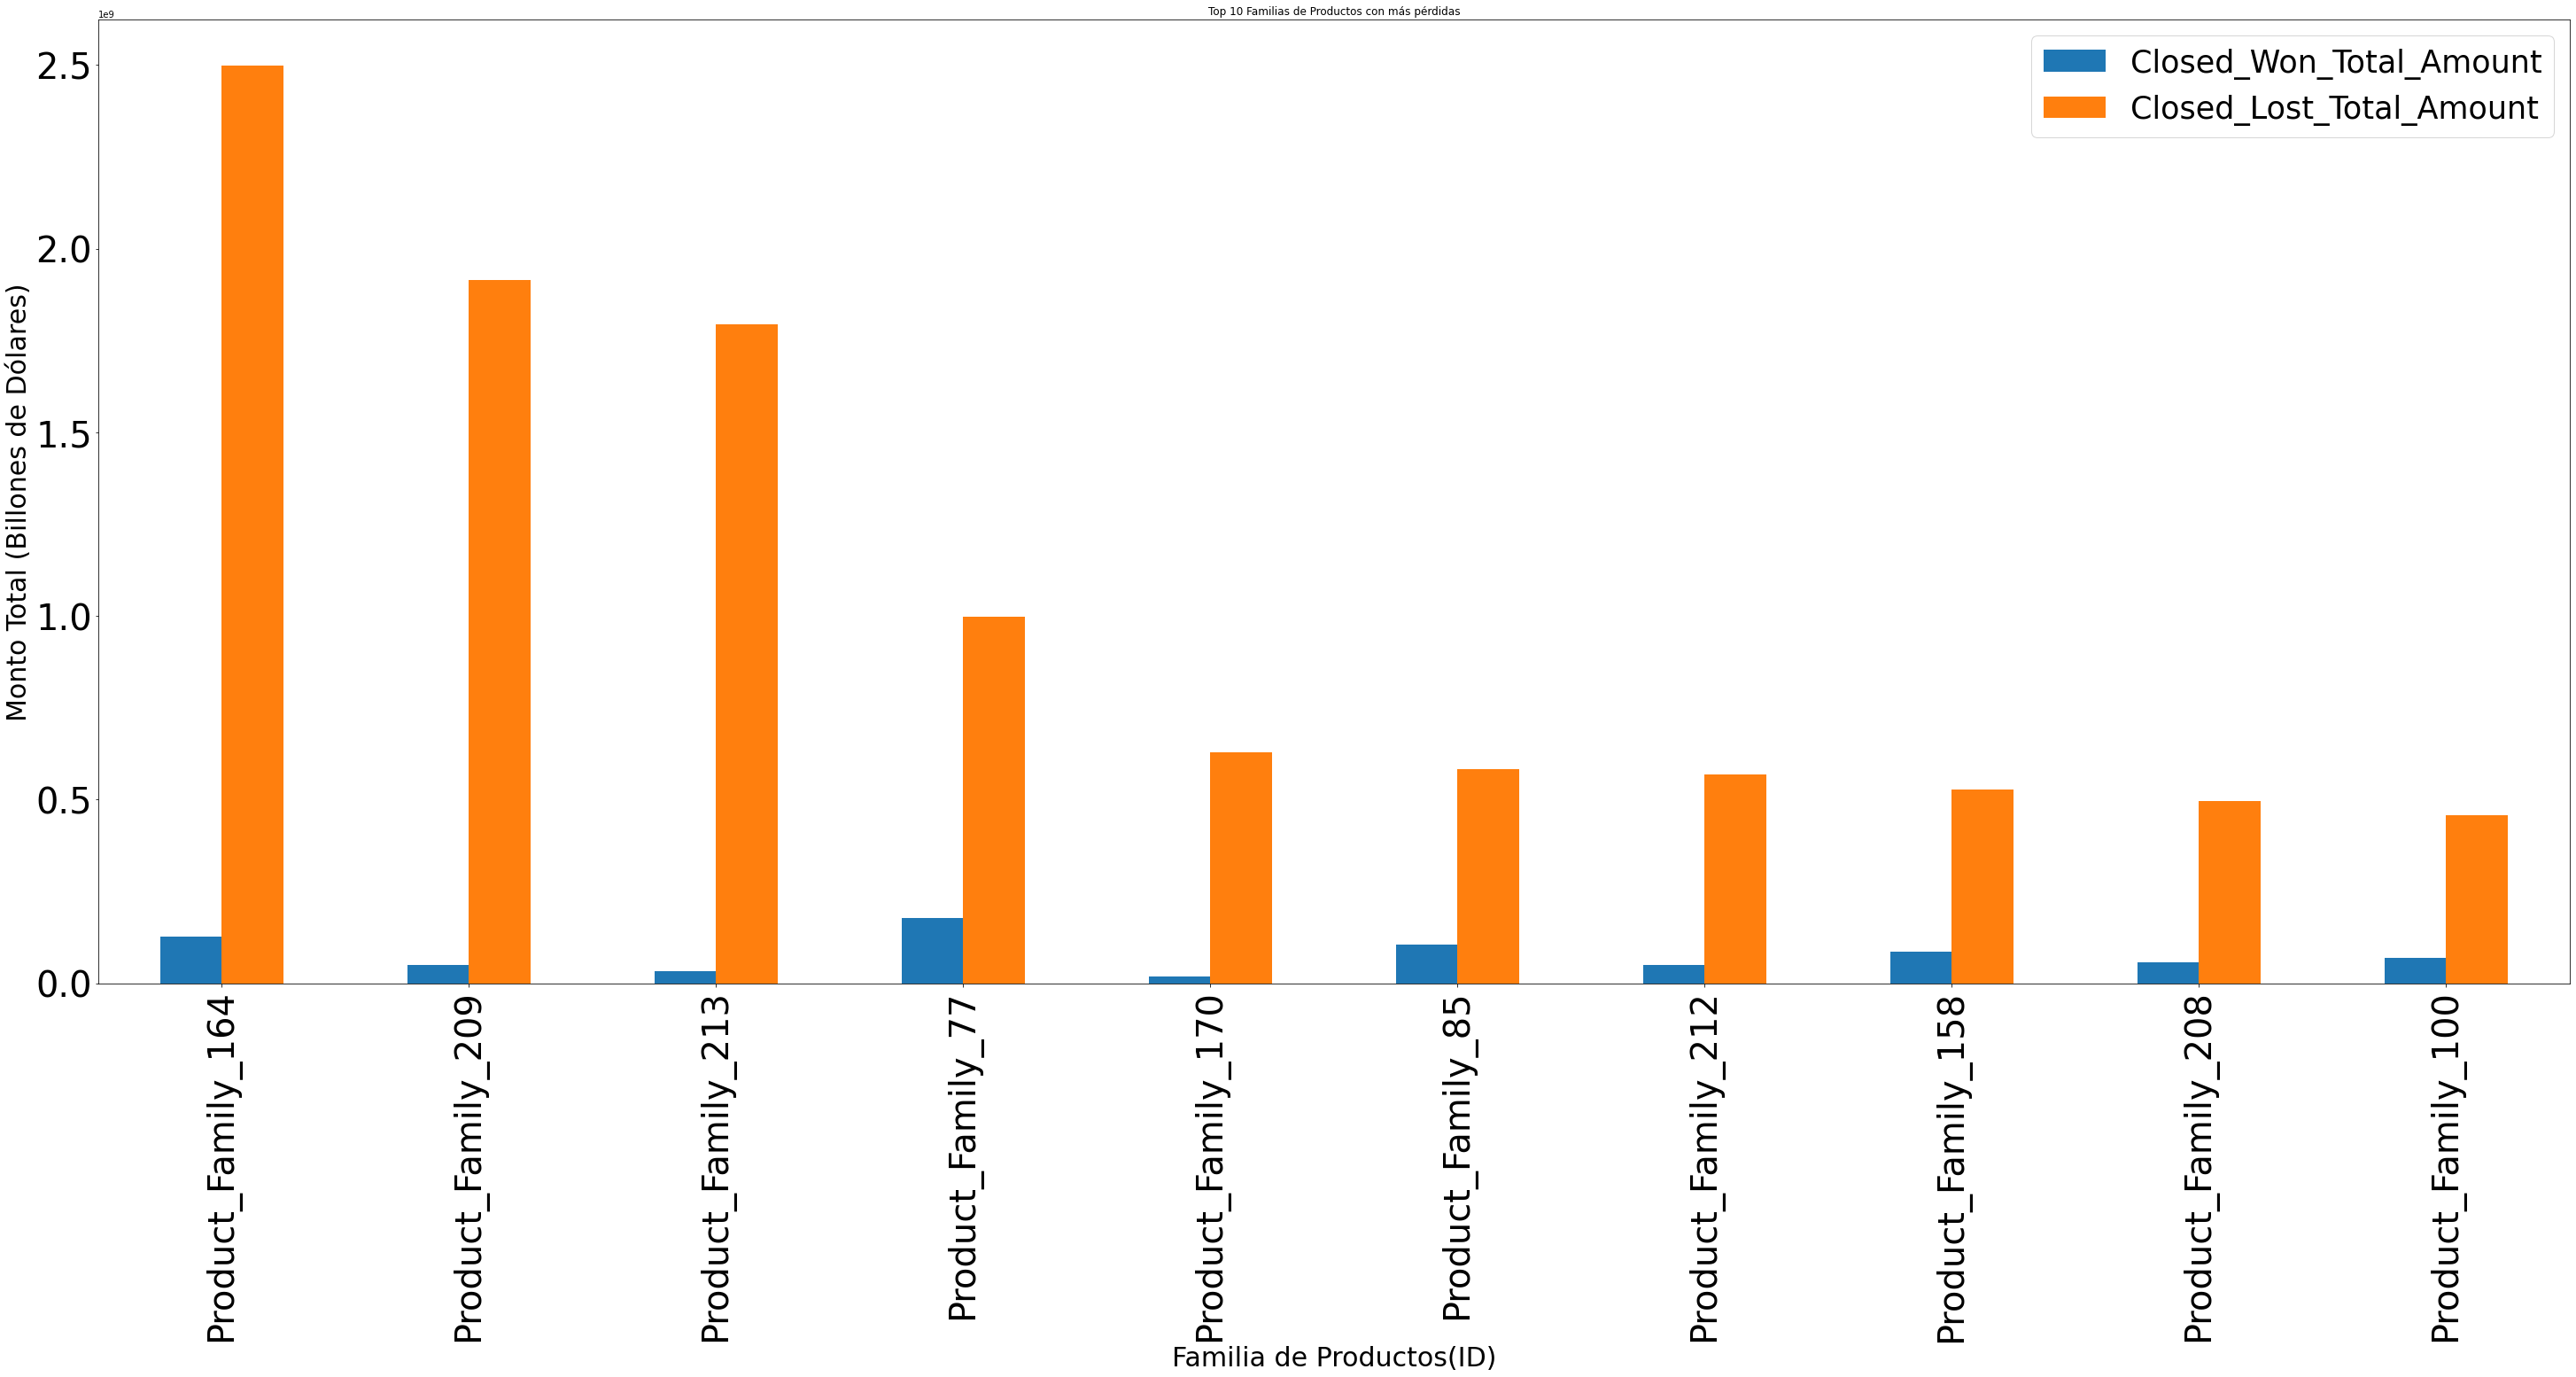

In [ ]:
grafico = masPerdidasPorFamilia.nlargest(10,'Closed_Lost_Total_Amount')[['Product_Family','Closed_Won_Total_Amount','Closed_Lost_Total_Amount']].plot.bar(x='Product_Family',figsize=(50,20), fontsize = 40)
grafico.set_title('Top 10 Familias de Productos con más pérdidas')
grafico.set_xlabel('Familia de Productos(ID)', fontsize = 30)
grafico.set_ylabel('Monto Total (Billones de Dólares)', fontsize = 30)
grafico.legend(prop={'size': 35})

In [ ]:
#Las 10 familias de productos con mas ganancias
masGananciasPorFamilia = totalVendidoPorFamilia[['Product_Family','Closed_Won_Total_Amount','Closed_Lost_Total_Amount']]
masGananciasPorFamilia['Relacion_Ganancia_Perdida'] = totalVendidoPorFamilia['Closed_Won_Total_Amount']/totalVendidoPorFamilia['Closed_Lost_Total_Amount']
masGananciasPorFamilia.nlargest(10,'Closed_Won_Total_Amount')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product_Family,Closed_Won_Total_Amount,Closed_Lost_Total_Amount,Relacion_Ganancia_Perdida
199,Product_Family_77,1.776664e+08,9.970460e+08,0.178193
36,Product_Family_133,1.658211e+08,1.961995e+08,0.845166
203,Product_Family_80,1.318897e+08,1.702533e+06,77.466732
60,Product_Family_164,1.263552e+08,2.498135e+09,0.050580
208,Product_Family_85,1.042937e+08,5.834762e+08,0.178745
55,Product_Family_158,8.710037e+07,5.283418e+08,0.164856
30,Product_Family_128,7.056173e+07,6.216700e+07,1.135035
3,Product_Family_100,6.969775e+07,4.565343e+08,0.152667
35,Product_Family_132,6.691165e+07,2.916460e+08,0.229428
17,Product_Family_116,6.382493e+07,1.054287e+08,0.605385


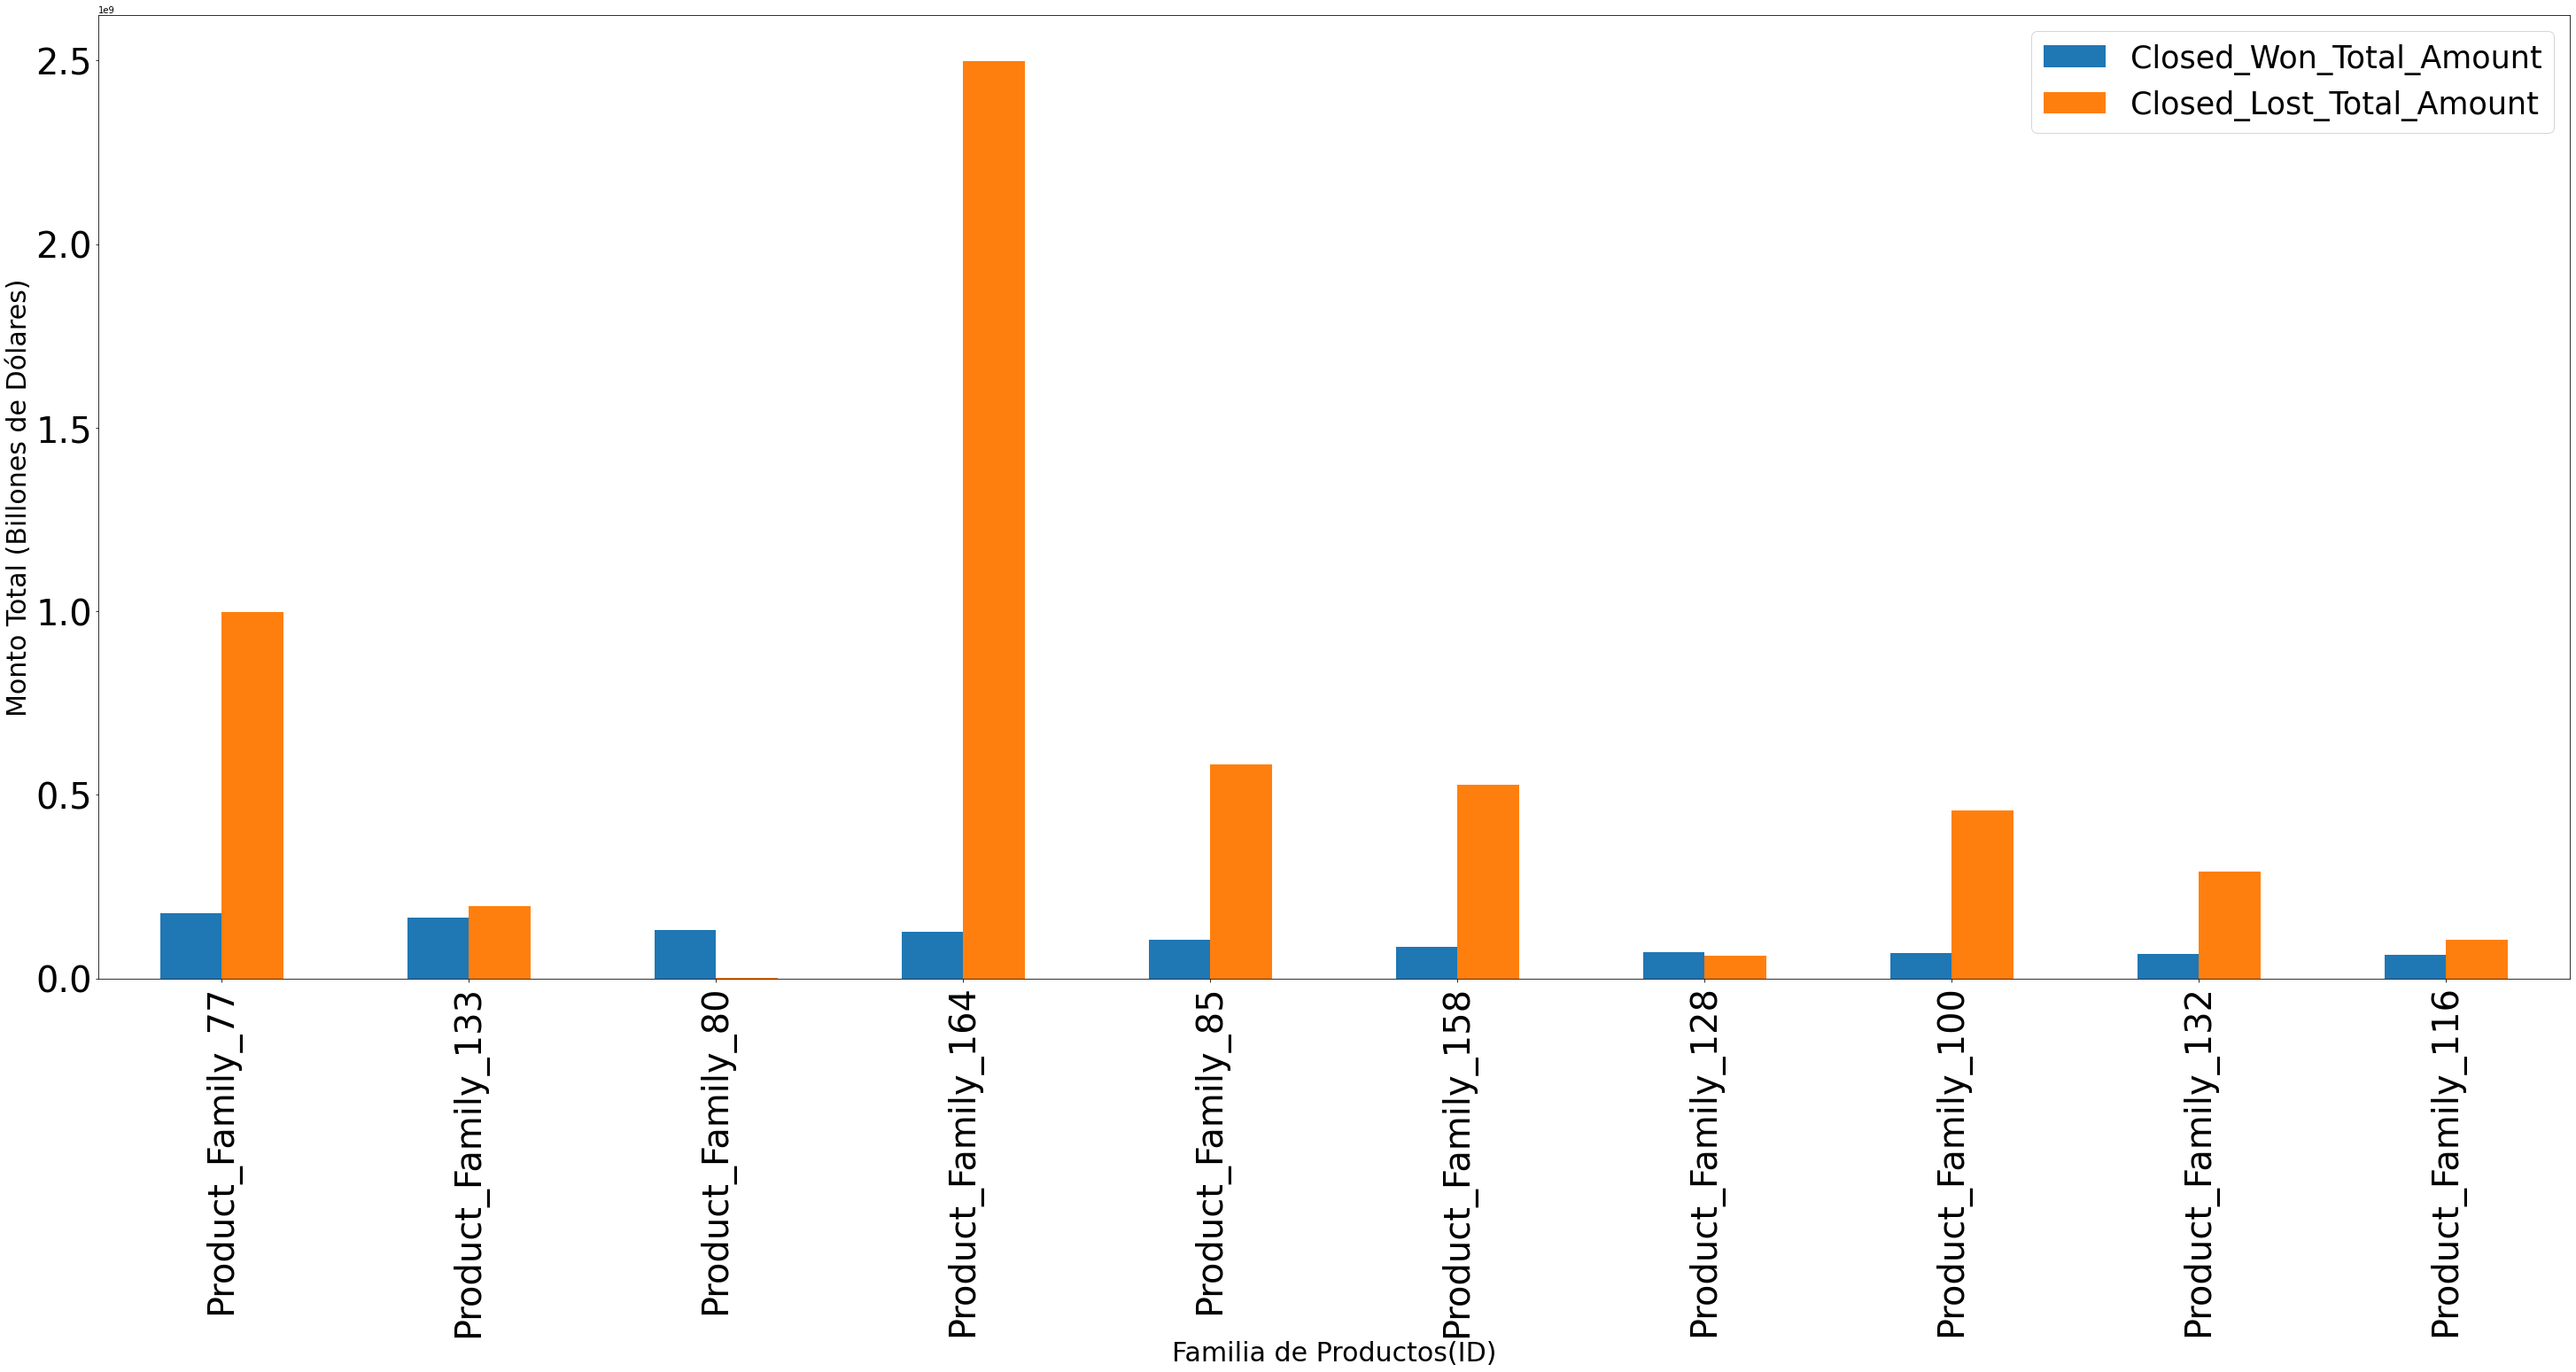

In [ ]:
grafico = masGananciasPorFamilia.nlargest(10,'Closed_Won_Total_Amount')[['Product_Family','Closed_Won_Total_Amount','Closed_Lost_Total_Amount']].plot.bar(x='Product_Family',figsize=(50,20), fontsize = 40)
grafico.set_xlabel('Familia de Productos(ID)', fontsize = 30)
grafico.set_ylabel('Monto Total (Billones de Dólares)', fontsize = 30)
grafico.legend(prop={'size': 35})

In [ ]:
#Cantidad Total vendida por cada Familia de Productos
totalCantidadVentasPorFamilia = df_changed.groupby(['Product_Family', 'Stage']).agg({'Total_Amount':'count'}).unstack()
totalCantidadVentasPorFamilia.columns=['Cantidad Ventas Perdidas','Cantidad Ventas Ganadas','Cantidad Ventas en Negociacion','Proposal_Cantidad_Ventas','Qualification_Cantidad_Ventas']
#totalCantidadVentasPorFamilia.reset_index(inplace=True)
totalCantidadVentasPorFamilia

,Cantidad Ventas Perdidas,Cantidad Ventas Ganadas,Cantidad Ventas en Negociacion,Proposal_Cantidad_Ventas,Qualification_Cantidad_Ventas
Product_Family,,,,,
Product_Family_0,69,96,0,0,0
Product_Family_1,4,9,0,0,0
Product_Family_10,40,76,0,0,0
Product_Family_100,302,317,0,0,0
Product_Family_101,10,8,0,0,0
...,...,...,...,...,...
Product_Family_98,2,5,0,0,0
Product_Family_99,0,12,0,0,0
Product_Family_159,1,0,0,0,0


<Figure size 432x288 with 0 Axes>

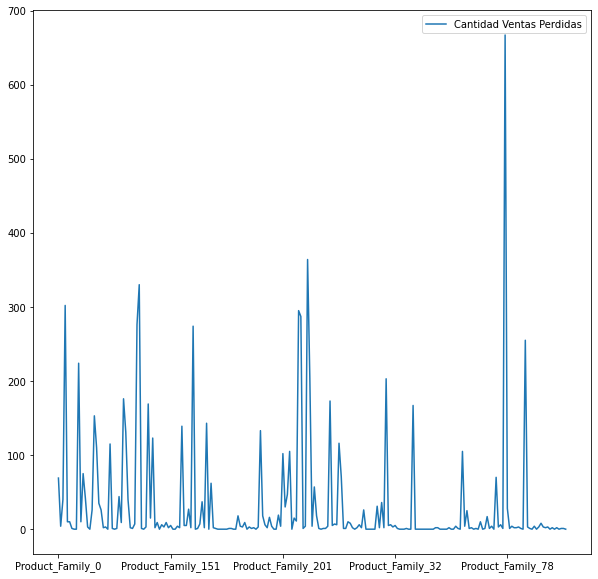

In [ ]:
plt.figure()
totalCantidadVentasPorFamilia.reset_index().plot(x='Product_Family',y='Cantidad Ventas Perdidas', fontsize=10,figsize=(10,10), xlabel='')

In [ ]:
CantidadPerdidas=totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Perdidas')
CantidadPerdidas['Cantidad Ventas Perdidas'].sum()

3274

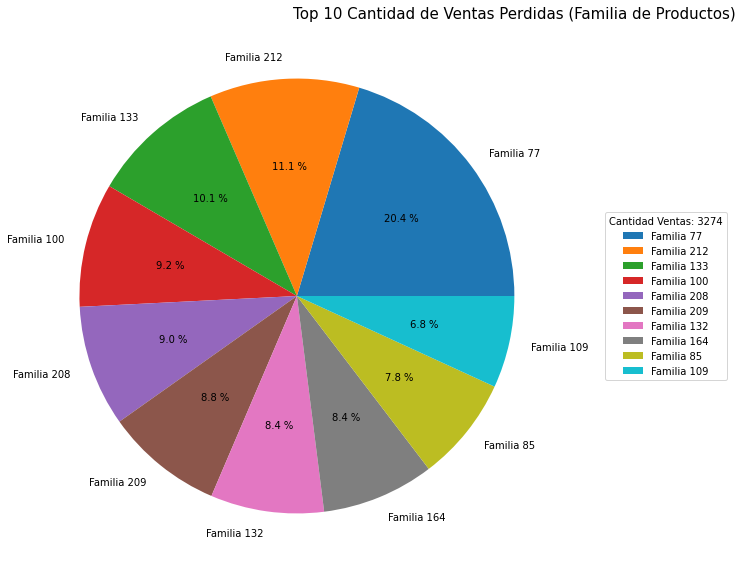

In [ ]:
familias = ['Familia 77','Familia 212','Familia 133','Familia 100','Familia 208','Familia 209','Familia 132','Familia 164','Familia 85','Familia 109']
graficoRelacionPerdidas = totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Perdidas').plot.pie(subplots=False,y='Cantidad Ventas Perdidas', labels=familias, xlim=(0,2), figsize= (10,10), ylabel='', autopct="%0.1f %%", fontsize = 10)
graficoRelacionPerdidas.set_title(label = 'Top 10 Cantidad de Ventas Perdidas (Familia de Productos)', fontsize = 15)
graficoRelacionPerdidas.legend(title='Cantidad Ventas: 3274',prop={'size':10}, loc='right')


In [ ]:
 totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Ganadas')

,Cantidad Ventas Perdidas,Cantidad Ventas Ganadas,Cantidad Ventas en Negociacion,Proposal_Cantidad_Ventas,Qualification_Cantidad_Ventas
Product_Family,,,,,
Product_Family_133,330,919,0,0,0
Product_Family_77,667,656,0,0,0
Product_Family_132,276,484,1,0,2
Product_Family_115,153,387,0,0,0
Product_Family_226,173,351,0,0,0
Product_Family_85,255,339,0,0,0
Product_Family_100,302,317,0,0,0
Product_Family_116,110,311,0,0,0
Product_Family_4,167,307,0,0,0


In [ ]:
cantidadesGanadas =totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Ganadas')
cantidadesGanadas['Cantidad Ventas Ganadas'].sum()

4376

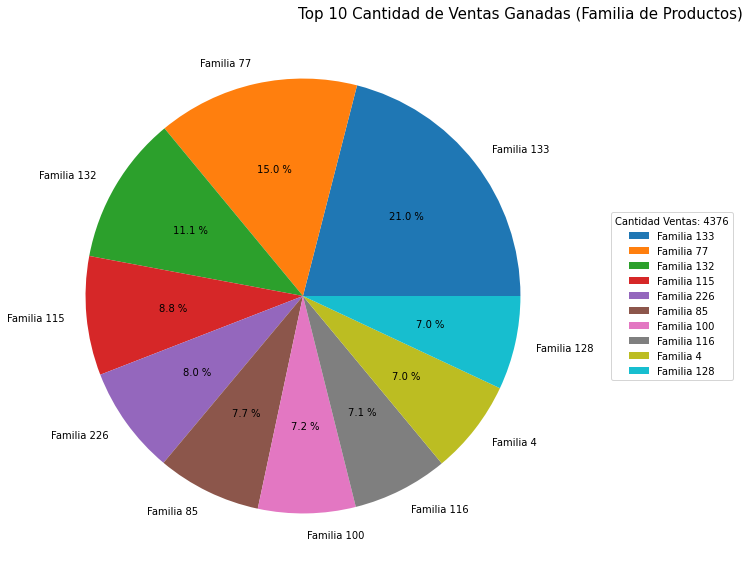

In [ ]:
familias2 = ['Familia 133','Familia 77','Familia 132','Familia 115','Familia 226','Familia 85','Familia 100','Familia 116','Familia 4','Familia 128']
graficoRelacionGanadas = totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Ganadas').plot.pie(subplots=False,y='Cantidad Ventas Ganadas', labels=familias2, xlim=(0,2), figsize= (10,10), ylabel='', autopct="%0.1f %%", fontsize = 10)
graficoRelacionGanadas.set_title(label = 'Top 10 Cantidad de Ventas Ganadas (Familia de Productos)', fontsize = 15)
graficoRelacionGanadas.legend(title='Cantidad Ventas: 4376',prop={'size':10}, loc='right')

Analisis de cantidad de ventas por producto

In [ ]:
appearence_by_product = df_frio_frio.groupby('Product_Name').agg({'ID': 'count'}).rename(columns={'ID':'Appearences'})

In [ ]:
won_by_product = df_frio_frio[df_frio_frio['Stage'] == 'Closed Won'].groupby('Product_Name').agg({'ID':'count'})\
.rename(columns={'ID':'Won'})
won_by_product.sort_values(by='Won',ascending=False).head(5)

,Won
Product_Name,
Product_Name_226,677
Product_Name_100,575
Product_Name_231,432
Product_Name_192,367
Product_Name_491,351


In [ ]:
lost_by_product = df_frio_frio[df_frio_frio['Stage'] == 'Closed Lost'].groupby('Product_Name').agg({'ID':'count'})\
.rename(columns={'ID':'Lost'})
lost_by_product.sort_values(by='Lost',ascending=False).head(5)

,Lost
Product_Name,
Product_Name_100,401
Product_Name_29,203
Product_Name_491,173
Product_Name_4,167
Product_Name_226,159


In [ ]:
won_lost_by_product = pd.merge(won_by_product, lost_by_product, on='Product_Name')
won_lost_by_product['Win_Percentage'] = won_lost_by_product['Won']/(won_lost_by_product['Lost']+won_lost_by_product['Won'])*100
won_lost_by_product.sort_values(by='Win_Percentage',ascending=False).head(5)

,Won,Lost,Win_Percentage
Product_Name,,,
Product_Name_275,1,0,100.0
Product_Name_304,2,0,100.0
Product_Name_387,6,0,100.0
Product_Name_60,1,0,100.0
Product_Name_39,1,0,100.0


Se repite el analisis, pero solo teniendo en cuenta aquellos productos que tienen mas de 20 ventas. De esta forma, se quitan aquellos productos que solo tienen 2 ventas exitosas y consiguen un 100% que no vale lo mismo que un producto que tiene mas ventas pero un peor porcentaje

In [ ]:
won_lost_by_product_20 = won_lost_by_product[(won_lost_by_product['Won']+won_lost_by_product['Lost'])>50]
won_lost_by_product_20.sort_values(by='Win_Percentage',ascending=False).head(10)

,Won,Lost,Win_Percentage
Product_Name,,,
Product_Name_24,165,2,98.802395
Product_Name_26,80,2,97.560976
Product_Name_61,90,4,95.744681
Product_Name_20,247,19,92.857143
Product_Name_383,83,16,83.838384
Product_Name_192,367,75,83.031674
Product_Name_167,270,63,81.081081
Product_Name_226,677,159,80.980861
Product_Name_85,127,31,80.379747


In [ ]:
df_vtas_ganadas = df_frio_frio[df_frio_frio['Stage'] == 'Closed Won']

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "AMERICAS" (AMÉRICA DEL NORTE)
# Q1 ≈ invierno
# Q2 ≈ primavera
# Q3 ≈ verano
# Q4 ≈ otoño
# Por mes: https://www.visittheusa.co/info/tiempo-y-estaciones-del-ano

Text(0, 0.5, 'Cantidad vendida')

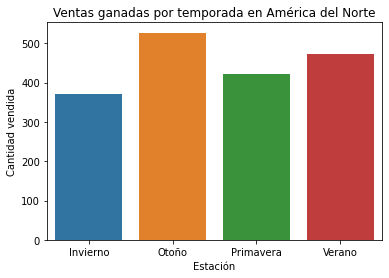

In [ ]:
ventas_americas_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'Americas', ['Month', 'Stage']]
# ventas_americas_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
# ventas_americas_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'],\
#                                                     ['Invierno', 'Primavera', 'Verano', 'Otoño'], inplace = True)
ventas_americas_ganadas['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                         ['Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano', \
                                         'Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno'], inplace = True)
ventas_americas_ganadas.columns = ['Estación', 'Stage']
ventas_ganadas_por_estacion_america = ventas_americas_ganadas.groupby('Estación').agg({'Stage' : 'count'})
ventas_ganadas_por_estacion_america.reset_index(inplace = True)

g = sns.barplot(x=ventas_ganadas_por_estacion_america['Estación'], y=ventas_ganadas_por_estacion_america['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en América del Norte')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "JAPAN" (JAPÓN)
# https://www.nippon.com/es/features/jg00059/#:~:text=La%20Agencia%20Nacional%20de%20Meteorolog%C3%ADa,invierno%2C%20de%20diciembre%20a%20febrero.
# Q1 ≈ invierno
# Q2 ≈ primavera
# Q3 ≈ verano
# Q4 ≈ otoño

Text(0, 0.5, 'Cantidad vendida')

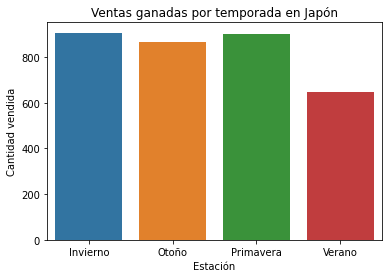

In [ ]:
ventas_japon_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'Japan', ['Month', 'Stage']]
# ventas_japon_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
ventas_japon_ganadas['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                      ['Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano', \
                                       'Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno'], inplace = True)
ventas_japon_ganadas.columns = ['Estación', 'Stage']
ventas_ganadas_por_estacion_japon = ventas_japon_ganadas.groupby('Estación').agg({'Stage' : 'count'})
ventas_ganadas_por_estacion_japon.reset_index(inplace = True)

g = sns.barplot(x=ventas_ganadas_por_estacion_japon['Estación'], y=ventas_ganadas_por_estacion_japon['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en Japón')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "MIDDLE EAST" (JAPÓN)
# https://www.visitsaudi.com/es/understand/climate-and-seasons
# Q1 ≈ invierno
# Q2 ≈ primavera
# Q3 ≈ verano
# Q4 ≈ otoño

Text(0, 0.5, 'Cantidad vendida')

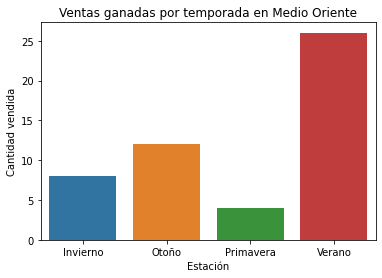

In [ ]:
ventas_mid_east_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'Middle East', ['Month', 'Stage']]
# ventas_mid_east_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
ventas_mid_east_ganadas['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                          ['Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano', \
                                            'Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno'], inplace = True)
ventas_mid_east_ganadas.columns = ['Estación', 'Stage']
ventas_ganadas_por_estacion_mid_east = ventas_mid_east_ganadas.groupby('Estación').agg({'Stage' : 'count'})
ventas_ganadas_por_estacion_mid_east.reset_index(inplace = True)

g = sns.barplot(x=ventas_ganadas_por_estacion_mid_east['Estación'], y=ventas_ganadas_por_estacion_mid_east['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en Medio Oriente')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "EMEA" (Europa, Medio Oriente y Asia)
# (Son todos países del hemisferio Norte)
# Q1 ≈ invierno
# Q2 ≈ primavera
# Q3 ≈ verano
# Q4 ≈ otoño

Text(0, 0.5, 'Cantidad vendida')

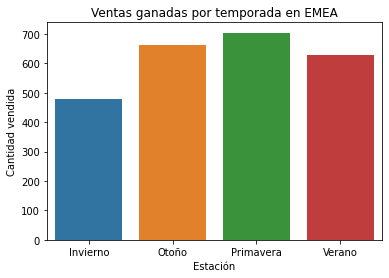

In [ ]:
ventas_emea_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'EMEA', ['Month', 'Stage']]
# ventas_emea_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
ventas_emea_ganadas['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                      ['Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano', \
                                       'Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno'], inplace = True)
ventas_emea_ganadas.columns = ['Estación', 'Stage']
ventas_ganadas_por_estacion_emea = ventas_emea_ganadas.groupby('Estación').agg({'Stage' : 'count'})
ventas_ganadas_por_estacion_emea.reset_index(inplace = True)

g = sns.barplot(x=ventas_ganadas_por_estacion_emea['Estación'], y=ventas_ganadas_por_estacion_emea['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en EMEA')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "APAC" (Asia - Pacífico)
# Todos los países están cerca del Ecuador, menos China y Corea del Sur (Norte) y Australia y Nueva Zelanda (Sur).

In [ ]:
# Veo cuánto influyen China y Corea del Sur en el total de ventas ganadas de APAC
ventas_apac_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'APAC', ['Territory', 'Month', 'Stage']]
china_y_corea_sur = ventas_apac_ganadas[(ventas_apac_ganadas['Territory'] == 'China (PRC)')\
                                        | (ventas_apac_ganadas['Territory'] == 'South Korea')]
print(len(china_y_corea_sur) / len(ventas_apac_ganadas))

# Veo cuánto influyen Australia y Nueva Zelanda en el total de ventas ganadas de APAC
australia_y_n_zelanda = ventas_apac_ganadas[(ventas_apac_ganadas['Territory'] == 'Australia')\
                                            | (ventas_apac_ganadas['Territory'] == 'New Zealand')]
print(len(australia_y_n_zelanda) / len(ventas_apac_ganadas))

# Veo cuánto influyen los otros territorios en el total de ventas ganadas de APAC
sudeste_asiatico = ventas_apac_ganadas[(ventas_apac_ganadas['Territory'] != 'Australia')\
                                        & (ventas_apac_ganadas['Territory'] != 'New Zealand')\
                                        & (ventas_apac_ganadas['Territory'] != 'China (PRC)')\
                                        & (ventas_apac_ganadas['Territory'] != 'South Korea')]
print(len(sudeste_asiatico) / len(ventas_apac_ganadas))

0.11286919831223628
0.38343881856540085
0.5036919831223629


In [ ]:
# La región de APAC se puede dividir en tres:
#     * Norte (11.29%): China y Corea del Sur               Se descarta por ser menos del 15%
#     * Sur (38.34%): Australia y Nueva Zelanda
#     * Sudeste asiático (50.37%): Países cerca del Ecuador

In [ ]:
# sudeste_asiatico['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
sudeste_asiatico['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                  ['Invierno', 'Invierno', 'Verano', 'Verano', 'Verano', 'Monzones (lluvias)', 'Monzones (lluvias)',\
                                   'Monzones (lluvias)', 'Monzones (lluvias)', 'Monzones (lluvias)', 'Invierno', 'Invierno'], inplace = True)
del sudeste_asiatico['Territory']
sudeste_asiatico.columns = ['Estación', 'Stage']
ventas_ganadas_por_estacion_sud_asia = sudeste_asiatico.groupby('Estación').agg({'Stage' : 'count'})
ventas_ganadas_por_estacion_sud_asia.reset_index(inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Text(0, 0.5, 'Cantidad vendida')

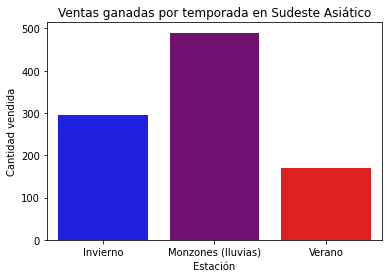

In [ ]:
g = sns.barplot(x=ventas_ganadas_por_estacion_sud_asia['Estación'], y=ventas_ganadas_por_estacion_sud_asia['Stage'],\
                orient='v', palette=['blue', 'purple', 'red']) #'#035485', '#742C98', '#B5240D'
g.set_title('Ventas ganadas por temporada en Sudeste Asiático')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

In [ ]:
# australia_y_n_zelanda['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
australia_y_n_zelanda['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                       ['Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno', 'Invierno',\
                                        'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano'], inplace = True)
del australia_y_n_zelanda['Territory']
australia_y_n_zelanda.columns = ['Estación', 'Stage']
ventas_ganadas_por_estacion_aust_nz = australia_y_n_zelanda.groupby('Estación').agg({'Stage' : 'count'})
ventas_ganadas_por_estacion_aust_nz.reset_index(inplace = True)

g = sns.barplot(x=ventas_ganadas_por_estacion_aust_nz['Estación'], y=ventas_ganadas_por_estacion_aust_nz['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en Australia y Nueva Zelanda')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

In [ ]:
ventas_ganadas_por_estacion_america['Region'] = 'América del Norte'
ventas_ganadas_por_estacion_japon['Region'] = 'Japón'
ventas_ganadas_por_estacion_mid_east['Region'] = 'Medio Oriente'
ventas_ganadas_por_estacion_emea['Region'] = 'EMEA'
ventas_ganadas_por_estacion_sud_asia['Region'] = 'Sudeste asiático'
ventas_ganadas_por_estacion_aust_nz['Region'] = 'Australia y Nueva Zelanda'

ventas_regiones = ventas_ganadas_por_estacion_america.append(ventas_ganadas_por_estacion_japon)\
                                                     .append(ventas_ganadas_por_estacion_mid_east)\
                                                     .append(ventas_ganadas_por_estacion_emea)\
                                                     .append(ventas_ganadas_por_estacion_sud_asia)\
                                                     .append(ventas_ganadas_por_estacion_aust_nz)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.barplot(x=ventas_regiones['Region'], y=ventas_regiones['Stage'], hue=ventas_regiones['Estación'], orient='v', ax=ax)
g.set_title('Ventas ganadas por temporada por Región\n', fontsize = 30)
g.set_xlabel('Regiones', fontsize = 18)
g.set_ylabel('Cantidad vendida', fontsize = 18)